In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'AppleGothic'
pd.set_option('display.max_columns', None)

In [3]:
cancel = pd.read_parquet('cancel.parquet')
change = pd.read_parquet('change.parquet')
new = pd.read_parquet('new.parquet')
pledge = pd.read_parquet('pledge.parquet')
transfer = pd.read_parquet('transfer.parquet')
registration = pd.read_parquet('registration.parquet')
itruck = pd.read_parquet('itrucktable.parquet')

## 말소등록
### **주요컬럼 : 신청구분명**
### (예시) 신청구분명과 차종명/차종유형 등 관련한 관계분석 
### => 도출 가능한 인사이트 : 말소되는 차량들에 공통점 파악 혹은 추세 파악 가능
- **신청구분명 unique** : ['자진말소(폐차)',
 '자진말소(수출예정)',
 '자진말소(대폐차)',
 '자진말소(환가가치 차령초과)',
 '자진말소(행정처분이행)',
 '자진말소(기타)',
 '자진말소(도로외의 지역에서의 한정 사용목적)',
 '자진말소(멸실)',
 '직권말소(강제처리)',
 '직권말소(면허취소)',
 '자진말소(제작자 또는 판매자에게 반품)',
 '직권말소(기타)',
 '자진말소(도난)',
 '직권말소(운행정지)',
 '자진말소(사고 원인의 규명 등 특수용도 사용목적)',
 '자진말소(천재지변/교통사고/화재/폭파/매몰 등의 사고)',
 '직권말소(타법률 등록요건 미충족)',
 '자진말소(차령초과)',
 '자진말소(차령만료 차령초과)',
 '직권말소(사위. 기타 부정등록)',
 '직권말소(등록신청자의 등록 불이행)',
 '자진말소(외교용 또는 SOFA차량으로서 내국민에게 양도)',
 '자진말소(도서지역에서의 해제)',
 '직권말소(차령만료 차령초과)',
 '자진말소(횡령)',
 '자진말소(연구/시험 사용목적)',
 '직권말소(현물과 등록원부상 차대상이)',
 '자진말소(편취)']
 
## 구조변경등록
### **주요컬럼 : 구조변경명**
### (예시) 구조변경명과 차종명/차종유형 등 관련한 관계분석 
### => 도출 가능한 인사이트 : 구조변경이 이루어지는 차들에 대한 분석
### => 이를 인기차종과 연결 지을 수 있을지는 좀 더 고려해봐야함.
- **구조변경명 unique** : ['동력전달장치',
 '배기가스발산방지장치',
 '등화장치',
 '소음방지장치',
 '연료장치',
 '원동기',
 '차체및차대',
 '원형구변',
 '연결및견인장치',
 '기타',
 '물품적재장치',
 '주행장치',
 '승차장치',
 '내압용기',
 '제동장치',
 '조향장치',
 nan]
 
## 신규등록
### **주요컬럼 : 신청구분명**
### (예시) 신청구분명과 차종명/차종유형 등 관련한 관계분석 
### => 도출 가능한 인사이트 : 신조차/ 부활차 / 수입차에 있어서 차종/차량과 관계가 있는지 확인가능
### => 예) 신조차 등록으로 신청한 차량들을 확인함으로 중고차 시장에 어떤 차량들이 올라오는지 추세 파악가능
    -신조차 : 중고차 시장에 처음 들어온 차들
- **신청구분명 unique** : ['신조차 신규등록', '수입차 신규등록', '부활차이전등록', '부활차단순등록']

## 이전등록
### **주요컬럼 : 이전등록구분명**
### 해당 데이터셋에만 있는 고유한 특성 표현이기에 일단 주요컬럼이라 판단
### => 도출 인사이트는 아직 구상중
- **이전등록구분명 unique**: ['당사자거래이전', '매매업자거래이전', '상속이전', '촉탁이전', '기타이전', '증여이전']

## Change (구조변경 등록 정보)

### 차량구조변경은 어떤걸 많이 신청할까? -> 결국 어떤 종류의 차가 인기 있는지를 알 수 있을 것이라 보여짐.

- 제원관리번호 : 자동차 제작사 혹은 수입사가 관련 기관에 해당 모델에 관한 자세한 제원 정보를 주게 되면 각 모델 별 제원을 관리하는 제원관리 번호가 발급
    - 제원 : 자동차 설계나 제조의 표준이 되고 형식승인을 받을 때 요구되는 항목
- 차종명 : 특수,화물로 구분
- 차종유형 : ['견인', '특수작업형', '구난', '일반형-픽업', '일반형-카고', '특수용도형-특수용도형', '밴', '특수용도형-피견인', '덤프', '특수용도형-탱크로리', '특수용도형']
    - 견인/피견인 : 견인 가능한 차량 /불가차량
    - 구난 : 견인차
- 차종분류명 : 대/중/소/경/nan
- 배기량 : 엔진 내부적으로 피스톤이 움직일 때 흡입, 배출되는 공기의 양 
    - 높으면 엔진의 크기가 크고 소비되는 연료도 많음 (일반적으로)
- 최대적재량 : 화물차 짐칸에 실을 수 있는 화물의 최대 분량
- 차대차체형상명 : 트럭형상
    - 캡 오버 : 차량의 캡이 맨 앞 끝까지 위치한 형식
    - 보넷 : 엔진이 위치한 보닛이 앞으로 튀어나온 형태 (컨벤셔널타입이라고도 부름)
    - 세미보넷 : 엔진 룸의 반 정도가 전면으로 돌출된 차량
- 변속기종류명 : ['자동', '수동', '반자동', '변속기 없음', '기타', nan, '무단']
- **용도구분명 : 용도구분**
    - 관용 : 정부기관 혹은 기업체에서 업무용으로 사용되는 차량
- 원동기최고출력 : 마력
- 연료소비율 : 연료 1리터로 주행할 수 있는 거리(킬로미터)
- 원동기RPM값 : 분당회전수 ( 엔진의 회전수가 높아질수록 토크가 일정하다면 출력도 높아진다. 그러나 동시에 연료 소모와 소음, 진동도 커진다. )
- 구동방식코드 : M X N 으로 표시하며 M 은 바퀴의 (위치)수, N 은 구동 바퀴의 (위치)수 로 표현
    - 구동 바퀴 : 엔진에서 발생한 동력이 전달 되는 바퀴

## Cancel ( 말소 등록 정보 ) 
### 어떤 차량들이 말소등록을 하는가 ? => 아마 대부분 연식이 오래된 차량 일 것이라 추측되어짐
- 제원관리번호 : 자동차 제작사 혹은 수입사가 관련 기관에 해당 모델에 관한 자세한 제원 정보를 주게 되면 각 모델 별 제원을 관리하는 제원관리 번호가 발급
    - 제원 : 자동차 설계나 제조의 표준이 되고 형식승인을 받을 때 요구되는 항목
- 차종명 : 특수,화물로 구분
- 차종유형 : ['견인', '특수작업형', '구난', '일반형-픽업', '일반형-카고', '특수용도형-특수용도형', '밴', '특수용도형-피견인', '덤프', '특수용도형-탱크로리', '특수용도형']
    - 견인/피견인 : 견인 가능한 차량 /불가차량
    - 구난 : 견인차
- 차종분류명 : 대/중/소/경/nan
- 배기량 : 엔진 내부적으로 피스톤이 움직일 때 흡입, 배출되는 공기의 양 
    - 높으면 엔진의 크기가 크고 소비되는 연료도 많음 (일반적으로)
- 최대적재량 : 화물차 짐칸에 실을 수 있는 화물의 최대 분량
- 차대차체형상명 : 트럭형상
    - 캡 오버 : 차량의 캡이 맨 앞 끝까지 위치한 형식
    - 보넷 : 엔진이 위치한 보닛이 앞으로 튀어나온 형태 (컨벤셔널타입이라고도 부름)
    - 세미보넷 : 엔진 룸의 반 정도가 전면으로 돌출된 차량
- 변속기종류명 : ['자동', '수동', '반자동', '변속기 없음', '기타', nan, '무단']
- 용도구분명 : 용도구분 
    - 관용 : 정부기관 혹은 기업체에서 업무용으로 사용되는 차량
- 원동기최고출력 : 마력
- 연료소비율 : 연료 1리터로 주행할 수 있는 거리(킬로미터)
- 원동기RPM값 : 분당회전수 ( 엔진의 회전수가 높아질수록 토크가 일정하다면 출력도 높아진다. 그러나 동시에 연료 소모와 소음, 진동도 커진다. )
- 구동방식코드 : M X N 으로 표시하며 M 은 바퀴의 (위치)수, N 은 구동 바퀴의 (위치)수 로 표현
    - 구동 바퀴 : 엔진에서 발생한 동력이 전달 되는 바퀴
- **신청구분명 : 말소 이유**
- 등록관청명 : 지역

 **기본적으로 change col 따라가되, 주행거리 등록관청명 신청구분명 필수적으로 추가**

## Pledge ( 저당 등록 정보 ) 
### 어떤 차량들이 말소등록을 하는가 ? => 아마 대부분 연식이 오래된 차량 일 것이라 추측되어짐
- 제원관리번호 : 자동차 제작사 혹은 수입사가 관련 기관에 해당 모델에 관한 자세한 제원 정보를 주게 되면 각 모델 별 제원을 관리하는 제원관리 번호가 발급
    - 제원 : 자동차 설계나 제조의 표준이 되고 형식승인을 받을 때 요구되는 항목
- 차종명 : 특수,화물로 구분
- 차종유형 : ['견인', '특수작업형', '구난', '일반형-픽업', '일반형-카고', '특수용도형-특수용도형', '밴', '특수용도형-피견인', '덤프', '특수용도형-탱크로리', '특수용도형']
    - 견인/피견인 : 견인 가능한 차량 /불가차량
    - 구난 : 견인차
- 차종분류명 : 대/중/소/경/nan
- 배기량 : 엔진 내부적으로 피스톤이 움직일 때 흡입, 배출되는 공기의 양 
    - 높으면 엔진의 크기가 크고 소비되는 연료도 많음 (일반적으로)
- 최대적재량 : 화물차 짐칸에 실을 수 있는 화물의 최대 분량
- 차대차체형상명 : 트럭형상
    - 캡 오버 : 차량의 캡이 맨 앞 끝까지 위치한 형식
    - 보넷 : 엔진이 위치한 보닛이 앞으로 튀어나온 형태 (컨벤셔널타입이라고도 부름)
    - 세미보넷 : 엔진 룸의 반 정도가 전면으로 돌출된 차량
- 변속기종류명 : ['자동', '수동', '반자동', '변속기 없음', '기타', nan, '무단']
- 용도구분명 : 용도구분 
    - 관용 : 정부기관 혹은 기업체에서 업무용으로 사용되는 차량
- 원동기최고출력 : 마력
- 연료소비율 : 연료 1리터로 주행할 수 있는 거리(킬로미터)
- 원동기RPM값 : 분당회전수 ( 엔진의 회전수가 높아질수록 토크가 일정하다면 출력도 높아진다. 그러나 동시에 연료 소모와 소음, 진동도 커진다. )
- 구동방식코드 : M X N 으로 표시하며 M 은 바퀴의 (위치)수, N 은 구동 바퀴의 (위치)수 로 표현
    - 구동 바퀴 : 엔진에서 발생한 동력이 전달 되는 바퀴
- **신청구분명 : 말소 이유**
- 등록관청명 : 지역

 **기본적으로 change col 따라가되, 주행거리 등록관청명 신청구분명 필수적으로 추가**

In [4]:
def compare(a,b):
    x = list(set(a) - set(b))
    y = list(set(b) - set(a))
    return x,y

In [5]:
cancel.drop(['원동기형식명', '사용본거지주소명','제원모델년도', '소유자주소명', '회원등록번호', '차량등록번호','사용본거지주소명', '소유자주소명', '차량중량'],axis=1, inplace=True)
cancel.drop(['타이어전전형식', '타이어전후형식','타이어후전형식','타이어후중형식','타이어후후형식'],axis=1, inplace=True)

In [6]:
engcol= ['manage_id', 'vehicle_type', 'vehicle_model', 'vehicle_cat','engine', 'displacement', 'passenger','max_load', 'vehicle_name', 'model_year', 'fuel','dom_import', 'vehicle_body', 'len', 'width', 'height', 'wheelbase','front_wb', 'back_wb', 'transmission', 'vin',
         'reg_area','purpose','apply_category','sale_reg_date', 'reg_detail', 'first_reg_date','man_date', 'member_classi',
         'mileage','max_output', 'consum_rate', 'weight', 'first_manage_id', 'rpm', 'dri_system','first_pur_amount']

In [7]:
cancel.columns = engcol

In [8]:
cancel.sale_reg_date.unique()

array([201704, 201703, 201212, 201607, 201611, 201705, 201210, 201706,
       201605, 201608, 201701, 201609, 201503, 201707, 201708, 201709,
       201510, 201606, 201710, 201602, 201304, 201711, 201202, 201712,
       201801, 201802, 201702, 201803, 200608, 201804, 201805, 200904,
       201806, 200210, 201807, 201512, 201508, 201808, 200707, 200805,
       200508, 201809, 201209, 201403, 201404, 201810, 201811, 201812,
       201006, 201901, 201902, 201903, 201603, 201904, 201905, 201906,
       201907, 201108, 201908, 201409, 201909, 201610, 201910, 201911,
       200801, 201912, 201507, 202001, 201208, 201207, 202002, 202003,
       202004, 201111, 202005, 202006, 202007, 200301, 202008, 202009,
       202010, 202011, 201001, 199806, 202012, 200404, 202101, 202102,
       200503, 201306, 202103, 201601, 202104, 202105, 202106, 201612,
       202107, 202108, 202109, 202110, 202111, 202112, 202201, 202202,
       202203, 202204, 202205, 202206, 202207], dtype=int32)

In [9]:
cancel.first_reg_date.unique()

array([199405, 200111, 200410, 200209, 200502, 200412, 199410, 199506,
       200103, 199804, 199612, 199504, 200902, 200003, 199610, 199706,
       199509, 199507, 199508, 200005, 199704, 200201, 199107, 201503,
       200702, 200507, 199411, 199606, 199601, 199703, 199012, 199512,
       199204, 200302, 199611, 199801, 199310, 201009, 199711, 200001,
       201511, 199609, 200105, 200610, 199505, 199702, 200207, 200205,
       199707, 200604, 199905, 200606, 199607, 200007, 200309, 199203,
       200710, 199404, 200210, 200311, 199309, 199406, 201310, 200306,
       200208, 200008, 199110, 199712, 200102, 199603, 199207, 199510,
       201704, 199806, 199912, 200304, 200312, 199502, 199701, 200107,
       200307, 199710, 201007, 199108, 200409, 199010, 200104, 200204,
       200308, 200303, 199401, 199403, 201305, 201410, 200006, 199201,
       199511, 199902, 200601, 198904, 200611, 200009, 199104, 200002,
       201512, 199901, 201307, 199302, 201206, 200206, 200012, 200411,
      

In [10]:
cancel['sale_reg_date'] = cancel['sale_reg_date'].astype({'sale_reg_date':'object'})

for i, value in enumerate(cancel['sale_reg_date'].values):
    cancel['sale_reg_date'].values[i] = f"{str(value)[:4]}-{str(value)[4:]}-01"

In [11]:
cancel['first_reg_date'] = cancel['first_reg_date'].astype({'first_reg_date':'object'})

for i, value in enumerate(cancel['first_reg_date'].values):
    cancel['first_reg_date'].values[i] = f"{str(value)[:4]}-{str(value)[4:]}-01"

In [12]:
file_12 = cancel
# 모델연도 datetime형태로 변경

file_12['sale_reg_date'] = pd.to_datetime(file_12['sale_reg_date'],format='%Y-%m-%d')

file_12['first_reg_date'] = pd.to_datetime(file_12['first_reg_date'],format='%Y-%m-%d')

cancel = file_12

### MANDATE

In [13]:
cancel[cancel['man_date'].isna()]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,vehicle_body,len,width,height,wheelbase,front_wb,back_wb,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount
11,10062800000001,특수,특수작업형,중형,IPK-151MT,6728.0,3.0,0.0,수산굴절식활선작업차,1997,경유,국산,캡오버,7560.0,2490.0,3380.0,4250.0,1770.0,1660.0,수동,KPPDG8LT1TXXXXXX,대전,자가용,자진말소(폐차),2017-04-01,일반소유용,1996-12-01,NaN,법인및사업자,161000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,10022800050001,특수,견인,대형,AM660TR,17238.0,2.0,16500.0,아시아트랙터,1997,경유,국산,캡오버,6622.0,2490.0,2840.0,4380.0,2045.0,1855.0,수동,KN52FT3F3SXXXXXX,부산,영업용,자진말소(폐차),2017-04-01,일반소유용,1995-04-01,NaN,법인및사업자,134000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,10008400130008,특수,견인,대형,CWE60GTL-A,14618.0,3.0,17000.0,쌍용트랙타,1997,경유,국산,캡오바,6655.0,2495.0,3125.0,4350.0,2040.0,1860.0,수동,KPFMC7CM1SXXXXXX,부산,영업용,자진말소(폐차),2017-04-01,일반소유용,1995-09-01,NaN,법인및사업자,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,10008400130008,특수,견인,대형,CWE60GTL-A,14618.0,3.0,17000.0,쌍용트랙타,1997,경유,국산,캡오바,6655.0,2495.0,3125.0,4350.0,2040.0,1860.0,수동,KPFMC7CM1SXXXXXX,부산,영업용,자진말소(폐차),2017-04-01,일반소유용,1995-07-01,NaN,법인및사업자,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,10008400130008,특수,견인,대형,CWE60GTL-A,14618.0,3.0,17000.0,쌍용트랙타,1997,경유,국산,캡오바,6655.0,2495.0,3125.0,4350.0,2040.0,1860.0,수동,KPFMC7CM1SXXXXXX,부산,영업용,자진말소(수출예정),2017-04-01,일반소유용,1995-08-01,NaN,개인,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540533,10000702800003,화물,일반형-카고,중형,SS-25LM,2701.0,3.0,1400.0,점보타이탄1.4톤와이드로우,2002,경유,국산,캡오버,4865.0,1710.0,1995.0,2495.0,1390.0,1270.0,수동,KNCWB8162PSXXXXXX,충남,자가용,자진말소(멸실),2022-07-01,일반소유용,1993-09-01,NaN,개인,NaN,75.0,13.0,3295.0,NaN,3600.0,NaN,NaN
540534,10000702040005,화물,일반형-카고,중형,XA-25DNL,2522.0,3.0,1250.0,점보타이탄1.25톤,2002,경유,국산,캡오버,4695.0,1710.0,1995.0,2495.0,1390.0,1270.0,수동,KNCWD8112MSXXXXXX,광주,자가용,자진말소(멸실),2022-07-01,일반소유용,1991-06-01,NaN,개인,NaN,73.0,15.6,3115.0,NaN,3600.0,NaN,NaN
540556,10015100000001,화물,특수용도형-특수용도형,경형,DA-1.7-ST,0.0,0.0,250.0,동아소형트레일러,2002,NaN,외산,세미트레일러,2790.0,1545.0,1045.0,1798.0,0.0,1270.0,수동,KPH7SCH01JPXXXXXX,충남,자가용,자진말소(폐차),2022-07-01,일반소유용,1988-07-01,NaN,개인,1000.0,NaN,NaN,540.0,NaN,NaN,NaN,NaN
540563,10011200050000,화물,특수용도형-특수용도형,대형,JGN-40L,0.0,0.0,28000.0,진도구즈넥콘테이너샤시,2002,NaN,외산,피견인형,12412.0,2426.0,1696.0,9798.0,0.0,1820.0,수동,KRIGUE2X0GIXXXXXX,인천,영업용,자진말소(대폐차),2022-07-01,일반소유용,1986-06-01,NaN,법인및사업자,1000.0,NaN,NaN,31650.0,NaN,NaN,NaN,NaN


In [14]:
cancel.loc[cancel['man_date'] == 99604, 'man_date'] = 199604

In [15]:
cancel.dropna(subset=['man_date'], inplace = True)

In [16]:
cancel['first_reg_date'] = pd.to_datetime(cancel['first_reg_date'],format='%Y-%m-%d')

In [17]:
cancel.isna().sum()

manage_id                 0
vehicle_type              0
vehicle_model             0
vehicle_cat             296
engine                  294
displacement           3124
passenger                53
max_load                 27
vehicle_name              0
model_year                0
fuel                   9517
dom_import                0
vehicle_body            954
len                      28
width                    28
height                   28
wheelbase                84
front_wb                126
back_wb                  88
transmission             37
vin                    3818
reg_area                  0
purpose                   0
apply_category            0
sale_reg_date             0
reg_detail                0
first_reg_date            0
man_date                  0
member_classi             0
mileage               11252
max_output           580933
consum_rate          577015
weight               576107
first_manage_id      767723
rpm                  580961
dri_system          

In [18]:
cancel.reset_index(drop=True, inplace = True)

## VEHICLECAT

In [19]:
cancel['vehicle_cat'].unique()

['대형', '소형', '중형', '경형', NaN]
Categories (4, object): ['경형', '대형', '소형', '중형']

### vehicle_cat 은 약 300개 적은 데이터 + 중요하다 판단 => drop

In [20]:
cancel.dropna(subset=['vehicle_cat'], inplace = True)

### DISPLACEMENT

In [21]:
cancel[(cancel['displacement'] > 0) &(cancel['vehicle_name'].str.contains('트레일러'))]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,vehicle_body,len,width,height,wheelbase,front_wb,back_wb,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount


In [22]:
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('트레일러')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('트래일러')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('샤시')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('싸인')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('사인')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('미래이동')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('은행')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('로우베드')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('트레이러')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('구난')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('구즈넥')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('트라마')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('트레라')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('레일러')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('XW300')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('DODGE RAM')), 'displacement'] = 0
cancel.loc[(cancel['displacement'].isna()) & (cancel['vehicle_name'].str.contains('BT500')), 'displacement'] = 0
cancel.loc[(cancel['manage_id'] == 'A0510001102583103'), 'displacement'] = 2874

In [23]:
cancel.dropna(subset=['displacement'], inplace = True)

In [24]:
cancel[cancel['displacement'].isna()]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,vehicle_body,len,width,height,wheelbase,front_wb,back_wb,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount


In [25]:
cancel.reset_index(drop=True,inplace = True)

In [26]:
a = cancel[cancel['displacement'] > 20000].index

In [27]:
cancel.drop(a,inplace = True)

/Users/shlee/miniforge3/envs/dlenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='displacement'>

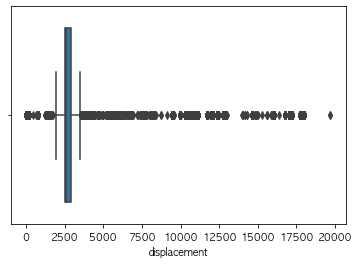

In [28]:
sns.boxplot(cancel['displacement'])

In [29]:
cancel.reset_index(drop=True,inplace = True)

### PASSENGER

In [30]:
cancel.dropna(subset = ['engine'], inplace = True)

In [31]:
cancel[cancel['passenger'].isna()]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,vehicle_body,len,width,height,wheelbase,front_wb,back_wb,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount
252457,B0910000800003303,화물,특수용도형-특수용도형,대형,MCC-40DAT,0.0,NaN,25500.0,미래40피트콤비네이션콘테이너샤시,2003,기타연료,국산,피견인형,12400.0,2410.0,1470.0,10300.0,NaN,1820.0,기타,KN9DNEXTZ3UXXXXXX,전남,영업용,자진말소(폐차),2018-07-01,일반소유용,2003-05-01,200305.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261271,B0910000800003303,화물,특수용도형-특수용도형,대형,MCC-40DAT,0.0,NaN,25500.0,미래40피트콤비네이션콘테이너샤시,2003,기타연료,국산,피견인형,12400.0,2410.0,1470.0,10300.0,NaN,1820.0,기타,KN9DNEXTZ3UXXXXXX,부산,영업용,자진말소(폐차),2018-08-01,일반소유용,2003-08-01,200308.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321375,A0110003128993116,화물,일반형-카고,소형,PUL6AK,2497.0,NaN,800.0,봉고Ⅲ 1톤,2017,경유,국산,ㅁ형프레임캡오버형,5115.0,1740.0,1995.0,2615.0,1490.0,1340.0,수동,KNCSJZ76AHKXXXXXX,인천,자가용,자진말소(수출예정),2018-12-01,일반소유용,2016-11-01,201611.0,개인,27000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332459,A0110003129993117,화물,일반형-카고,소형,PUL6AL,2497.0,NaN,600.0,봉고Ⅲ 1톤,2018,경유,국산,ㅁ형프레임캡오버형,5115.0,1740.0,1995.0,2615.0,1490.0,1340.0,수동,KNCSJZ76AJKXXXXXX,경남,자가용,자진말소(수출예정),2018-12-01,매매상품용,2018-03-01,201802.0,법인및사업자,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344402,A0810006215353115,화물,일반형-카고,소형,HRLKAM,2497.0,NaN,1000.0,포터Ⅱ (PORTERⅡ),2016,경유,국산,캡오버,5100.0,1740.0,1970.0,2640.0,1485.0,1320.0,수동,KMFZCZ7KAGUXXXXXX,서울,자가용,자진말소(수출예정),2019-01-01,일반소유용,2015-11-01,201510.0,개인,166000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378731,A0110003128993116,화물,일반형-카고,소형,PUL6AK,2497.0,NaN,800.0,봉고Ⅲ 1톤,2017,경유,국산,ㅁ형프레임캡오버형,5115.0,1740.0,1995.0,2615.0,1490.0,1340.0,수동,KNCSJZ76AHKXXXXXX,충남,자가용,자진말소(수출예정),2019-03-01,매매상품용,2017-02-01,201702.0,법인및사업자,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397695,A0110003129993117,화물,일반형-카고,소형,PUL6AL,2497.0,NaN,700.0,봉고Ⅲ 1톤,2018,경유,국산,ㅁ형프레임캡오버형,5115.0,1740.0,1995.0,2615.0,1490.0,1340.0,수동,KNCSJZ76AJKXXXXXX,인천,자가용,자진말소(수출예정),2019-04-01,매매상품용,2017-12-01,201711.0,법인및사업자,13000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398984,A0810006217273117,화물,일반형-카고,소형,HRTKAP,2497.0,NaN,600.0,포터Ⅱ (PORTERⅡ),2018,경유,국산,캡오버,5175.0,1740.0,1970.0,2640.0,1485.0,1320.0,수동,KMFZCX7KAJUXXXXXX,대구,영업용,자진말소(행정처분이행),2019-04-01,일반소유용,2018-01-01,201712.0,개인,27000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416476,A0110003125753113,화물,일반형-카고,소형,PUL6AH,2497.0,NaN,600.0,봉고Ⅲ 1톤,2014,경유,국산,ㅁ형프레임캡오버형,5115.0,1740.0,1995.0,2615.0,1490.0,1340.0,수동,KNCSJZ76AEKXXXXXX,경기,영업용,자진말소(기타),2019-05-01,일반소유용,2014-07-01,201407.0,개인,62000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417517,A0110003128993116,화물,일반형-카고,소형,PUL6AK,2497.0,NaN,800.0,봉고Ⅲ 1톤,2017,경유,국산,ㅁ형프레임캡오버형,5115.0,1740.0,1995.0,2615.0,1490.0,1340.0,수동,KNCSJZ76AHKXXXXXX,인천,자가용,자진말소(수출예정),2019-05-01,일반소유용,2017-01-01,201701.0,개인,34000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
cancel.loc[(cancel['vehicle_name'].str.contains('샤시')) & (cancel['passenger'].isna()),'passenger'] = 0
cancel.loc[(cancel['vehicle_name'].str.contains('레일러')) & (cancel['passenger'].isna()),'passenger'] = 0
cancel.loc[(cancel['vehicle_name'].str.contains('표시')) & (cancel['passenger'].isna()),'passenger'] = 0
cancel.loc[(cancel['vehicle_name'].str.contains('레일러')) & (cancel['passenger'].isna()),'passenger'] = 0
cancel.loc[(cancel['vehicle_name'].str.contains('봉고Ⅲ 1톤')) & (cancel['passenger'].isna()) & (cancel['manage_id'] == 'A0110003129993116')
          &(cancel['engine'] == 'PUL6AL') , 'passenger'] = 3
cancel.loc[(cancel['vehicle_name'].str.contains('봉고Ⅲ 1톤')) & (cancel['passenger'].isna()) &(cancel['engine'].str.contains('PUL6')),'passenger'] =3
cancel.loc[(cancel['passenger'].isna()) &(cancel['manage_id'] == 'A0810006215353115'),'passenger'] = 3
cancel.loc[(cancel['passenger'].isna()) &(cancel['engine'].str.contains('HRLK')),'passenger'] = 3
cancel['passenger'].fillna(3,inplace = True)

In [33]:
cancel.loc[(cancel['passenger'] >0) &(cancel['manage_id'] == 'A0810006215353115')]['passenger'].unique()

array([3.], dtype=float32)

In [34]:
cancel.loc[(cancel['passenger'] >0) &(cancel['engine'] == 'HRTKAP')]['passenger'].unique()

array([3.], dtype=float32)

### MAXLOAD

In [35]:
cancel[(cancel['max_load'].isna())]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,vehicle_body,len,width,height,wheelbase,front_wb,back_wb,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount
207445,C6N10000200004116,특수,특수작업형,소형,SKF-SBT2100,0.0,0.0,NaN,에스케이에프사인보드트레일러,2017,NaN,국산,피견인형,4940.0,2385.0,2845.0,4040.0,0.0,2090.0,변속기 없음,KP9GN3ZTZHKXXXXXX,충남,자가용,자진말소(폐차),2018-05-01,일반소유용,2016-11-01,201610.0,법인및사업자,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254726,B9110000600004114,특수,특수작업형,소형,SHRSB-VB2,0.0,0.0,NaN,성화싸인보드트레일러,2015,NaN,국산,피견인형,4700.0,2125.0,2550.0,3310.0,0.0,1505.0,변속기 없음,KP9GN3ZTZFSXXXXXX,충남,자가용,자진말소(폐차),2018-08-01,일반소유용,2014-12-01,201412.0,법인및사업자,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451078,B9110000700004115,특수,특수작업형,소형,SHRSB-VB2016,0.0,0.0,NaN,성화싸인보드트레일러,2016,NaN,국산,피견인형,5020.0,2395.0,3860.0,4210.0,0.0,2100.0,변속기 없음,KP9GN3ZTZGSXXXXXX,대전,자가용,자진말소(폐차),2019-07-01,일반소유용,2015-12-01,201512.0,법인및사업자,124000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605329,B9110000700004115,특수,특수용도형,소형,SHRSB-VB2016,0.0,0.0,NaN,성화싸인보드트레일러,2016,NaN,국산,피견인형,5020.0,2395.0,3860.0,4210.0,0.0,2100.0,변속기 없음,KP9GN3ZTZGSXXXXXX,강원,자가용,자진말소(폐차),2020-03-01,일반소유용,2015-12-01,201512.0,법인및사업자,50000.0,NaN,NaN,1370.0,NaN,NaN,NaN,25000000.0
665492,B9110000900004116,특수,특수용도형,소형,SHRSB-VB2016-01,0.0,0.0,NaN,성화싸인보드트레일러,2017,NaN,국산,피견인형,5075.0,2390.0,3835.0,4165.0,0.0,2100.0,변속기 없음,KP9GN3ZTZHSXXXXXX,대구,자가용,자진말소(폐차),2020-06-01,일반소유용,2016-12-01,201612.0,법인및사업자,1000.0,NaN,NaN,1500.0,NaN,NaN,NaN,22000000.0
683462,B9110000700004115,특수,특수용도형,소형,SHRSB-VB2016,0.0,0.0,NaN,성화싸인보드트레일러,2016,NaN,국산,피견인형,5020.0,2395.0,3860.0,4210.0,0.0,2100.0,변속기 없음,KP9GN3ZTZGSXXXXXX,충남,자가용,자진말소(폐차),2020-07-01,일반소유용,2015-12-01,201512.0,법인및사업자,0.0,NaN,NaN,1370.0,NaN,NaN,NaN,25000000.0
683498,D1720000200004119,특수,특수용도형,소형,WALDEN_PE,2299.0,3.0,NaN,에스씨미디어이동업무차,2019,경유,외산,밴형,5550.0,2180.0,2465.0,3685.0,1750.0,1730.0,수동,VF1MA000XKBXXXXXX,경기,자가용,자진말소(폐차),2020-07-01,일반소유용,2019-08-01,201907.0,개인,16000.0,145.0,15.3,3155.0,05220000500003218,3500.0,4x2,63600000.0
754898,B9110001200004119,특수,특수용도형,소형,SHRSB-VB2-2020,0.0,0.0,NaN,성화사인보드트레일러,2020,NaN,국산,피견인형,3900.0,2100.0,2850.0,3030.0,0.0,1505.0,변속기 없음,KP9GN3ZTZLSXXXXXX,경기,자가용,자진말소(폐차),2020-11-01,일반소유용,2019-12-01,201912.0,법인및사업자,1000.0,NaN,NaN,1750.0,NaN,NaN,없음,21700000.0
774698,B3510006800004212,특수,특수용도형,중형,DHT 105S-01,3933.0,3.0,NaN,동해 절연고소작업차,2011,경유,국산,"ㄷ형프레임,캡오버형",5750.0,2085.0,3200.0,2820.0,1665.0,1495.0,수동,KMFGA17HPBCXXXXXX,대전,자가용,자진말소(폐차),2020-12-01,일반소유용,2012-02-01,201201.0,법인및사업자,491000.0,160.0,10.2,6415.0,A0810005009863210,2500.0,NaN,79700000.0
774791,B9110001200004119,특수,특수용도형,소형,SHRSB-VB2-2020,0.0,0.0,NaN,성화사인보드트레일러,2020,NaN,국산,피견인형,3900.0,2100.0,2850.0,3030.0,0.0,1505.0,변속기 없음,KP9GN3ZTZLSXXXXXX,전북,자가용,자진말소(폐차),2020-12-01,일반소유용,2019-12-01,201912.0,법인및사업자,57000.0,NaN,NaN,1750.0,NaN,NaN,없음,21700000.0


In [36]:
cancel.loc[(cancel['manage_id'] == 'C6N10000200004116'),'max_load'] = 0
cancel.loc[(cancel['vehicle_name'] =='성화싸인보드트레일러') & (cancel['max_load'].isna()),'max_load'] = 0
cancel.loc[(cancel['vehicle_name'] =='성화사인보드트레일러') & (cancel['max_load'].isna()),'max_load'] = 0
cancel.loc[(cancel['vehicle_name'] =='동해 절연고소작업차') & (cancel['max_load'].isna()),'max_load'] = 0
cancel.loc[(cancel['vehicle_name'] =='동해절연고소작업차') & (cancel['max_load'].isna()),'max_load'] = 0
cancel.loc[(cancel['vehicle_name'] =='한신 울트라 고소작업차') & (cancel['max_load'].isna()),'max_load'] = 0
cancel.loc[(cancel['vehicle_name'].str.contains('이동업무')) & (cancel['max_load'].isna()),'max_load'] = 0
cancel.loc[(cancel['vehicle_name'].str.contains('사인보드')) & (cancel['max_load'].isna()),'max_load'] = 0
cancel.loc[(cancel['manage_id'] == 'B0H10023800004212')& (cancel['max_load'].isna()),'max_load'] = 0
cancel.loc[(cancel['manage_id'] == 'B4T10012000004311')& (cancel['max_load'].isna()),'max_load'] = 0
cancel['max_load'].fillna(0,inplace = True)

In [37]:
cancel.loc[(cancel['vehicle_name'] =='한신 울트라 고소작업차')]['max_load'].unique()

array([0.], dtype=float32)

In [38]:
cancel.loc[(cancel['vehicle_name'].str.contains('인명'))]['max_load']

933612    0.0
960481    0.0
Name: max_load, dtype: float32

In [39]:
cancel.loc[(cancel['manage_id'] == 'B4T10012000004311')]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,vehicle_body,len,width,height,wheelbase,front_wb,back_wb,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount
896452,B4T10012000004311,특수,특수용도형,대형,ERE-DALRC4D8T,7640.0,5.0,0.0,이엔쓰리 구조소방차,2012,경유,국산,캡오버형,8470.0,2495.0,3300.0,4650.0,2080.0,1850.0,자동,KLTCH4CK5CKXXXXXX,대구,관용,자진말소(도로외의 지역에서의 한정 사용목적),2021-06-01,일반소유용,2012-01-01,201112.0,법인및사업자,115000.0,320.0,5.7,11985.0,A0310009600063310,2200.0,NaN,193000000.0
989747,B4T10012000004311,특수,특수용도형,대형,ERE-DALRC4D8T,7640.0,5.0,0.0,이엔쓰리 구조소방차,2012,경유,국산,캡오버형,8470.0,2495.0,3300.0,4650.0,2080.0,1850.0,자동,KLTCH4CK5CKXXXXXX,전남,관용,자진말소(폐차),2021-12-01,일반소유용,2012-07-01,201207.0,법인및사업자,122000.0,320.0,5.7,11985.0,A0310009600063310,2200.0,NaN,222000000.0
1013178,B4T10012000004311,특수,특수용도형,대형,ERE-DALRC4D8T,7640.0,5.0,0.0,이엔쓰리 구조소방차,2012,경유,국산,캡오버형,8470.0,2495.0,3300.0,4650.0,2080.0,1850.0,자동,KLTCH4CK5CKXXXXXX,경기,관용,자진말소(폐차),2022-02-01,일반소유용,2012-07-01,201207.0,법인및사업자,135000.0,320.0,5.7,11985.0,A0310009600063310,2200.0,NaN,222000000.0


In [40]:
cancel.reset_index(drop=True, inplace = True)

/Users/shlee/miniforge3/envs/dlenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_load'>

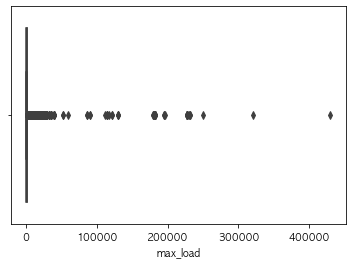

In [41]:
sns.boxplot(cancel['max_load'])

### FUEL

In [42]:
cancel[(cancel['fuel'].isna()) & (~cancel['vehicle_name'].str.contains('트레일'))& (~cancel['vehicle_name'].str.contains('샤시')) & (~cancel['vehicle_name'].str.contains('RW'))
 & (~cancel['vehicle_name'].str.contains('인카'))& (~cancel['vehicle_name'].str.contains('작업'))
      & (~cancel['vehicle_name'].str.contains('트래일'))& (cancel['displacement']>0)]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,vehicle_body,len,width,height,wheelbase,front_wb,back_wb,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount
815,10057001380000,화물,일반형-카고,소형,HAUTSRLM-1,2607.0,3.0,600.0,포터초장축슈퍼캡,2001,NaN,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BP1XXXXXX,대전,영업용,직권말소(면허취소),2017-04-01,일반소유용,2001-03-01,200102.0,개인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352832,A0510001200023103,화물,밴,소형,KVYT4-103,2874.0,2.0,500.0,코란도-밴,2003,NaN,국산,4륜구동 본넷트형,4420.0,1855.0,1840.0,2480.0,1510.0,1520.0,수동,KPALA4MD13PXXXXXX,경기,자가용,자진말소(폐차),2019-02-01,일반소유용,2003-05-01,200305.0,개인,240000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430730,A0510001200883103,화물,밴,소형,KVNT4-103,2874.0,2.0,500.0,코란도-밴,2003,NaN,국산,4륜구동 본넷트형,4420.0,1855.0,1840.0,2480.0,1510.0,1520.0,수동,KPALA4M813PXXXXXX,경북,자가용,자진말소(폐차),2019-05-01,일반소유용,2003-07-01,200306.0,개인,104000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688740,10057000890001,화물,일반형-카고,소형,HAU2BLD-3,2607.0,3.0,1000.0,포터초장축슈퍼캡,2000,NaN,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BPXUXXXXXX,전북,자가용,자진말소(폐차),2020-07-01,일반소유용,1999-12-01,199911.0,개인,322000.0,83.0,14.8,2725.0,NaN,4000.0,NaN,0.0
914898,A0510001103243104,화물,일반형-픽업,소형,MPYA2-104,2874.0,5.0,400.0,무쏘-픽업,2005,NaN,국산,2륜구동본넷트형,5025.0,1865.0,1760.0,2755.0,1510.0,1520.0,자동,KPAKE4AD15PXXXXXX,제주,자가용,자진말소(폐차),2021-06-01,일반소유용,2005-07-01,200506.0,개인,249000.0,120.0,9.3,2570.0,A0510001100003103,4000.0,NaN,17300000.0


In [43]:
cancel.loc[(cancel['engine'] == 'HDH-40-PTC-35')& (cancel['fuel'].isna()),'fuel'] = '기타연료'
cancel.loc[(cancel['engine'] == 'KVNT4-103')& (cancel['fuel'].isna()),'fuel'] = '경유'
cancel.loc[(cancel['engine'] == 'MPYA2-104')& (cancel['fuel'].isna()),'fuel'] = '경유'
cancel.loc[(cancel['engine'] == 'HAUTSRLM-1')& (cancel['fuel'].isna()) & (cancel['model_year'] <2002),'fuel'] = '엘피지'
cancel.loc[(cancel['engine'] == 'HAUTSRLM-1')& (cancel['fuel'].isna()) & (cancel['model_year'] >= 2002),'fuel'] = '경유'
cancel.loc[(cancel['engine'] =='HAU2BLD-3') &(cancel['vin'] == 'KMFXKS7BPXUXXXXXX') & (cancel['fuel'].isna()),'fuel'] = '경유'
cancel.loc[(cancel['manage_id'] == 'A0510001200023103')& (cancel['fuel'].isna()),'fuel'] = '경유'

In [44]:
cancel[(cancel['engine'] =='HAU2BLD-3') &(cancel['vin'] == 'KMFXKS7BPXUXXXXXX')]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,vehicle_body,len,width,height,wheelbase,front_wb,back_wb,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount
189590,10057000890001,화물,일반형-카고,소형,HAU2BLD-3,2607.0,3.0,1000.0,포터초장축슈퍼캡,1999,경유,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BPXUXXXXXX,세종,자가용,자진말소(폐차),2018-04-01,일반소유용,1999-10-01,199910.0,개인,395000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189653,10057000890000,화물,일반형-카고,소형,HAU2BLD-3,2607.0,3.0,1000.0,포터초장축슈퍼캡,1999,경유,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BPXUXXXXXX,울산,자가용,자진말소(폐차),2018-04-01,일반소유용,1999-04-01,199904.0,개인,149000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189668,10057000890001,화물,일반형-카고,소형,HAU2BLD-3,2607.0,3.0,1000.0,포터초장축슈퍼캡,1999,경유,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BPXUXXXXXX,부산,자가용,자진말소(폐차),2018-04-01,일반소유용,1999-12-01,199911.0,개인,399000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189735,10057000890001,화물,일반형-카고,소형,HAU2BLD-3,2607.0,3.0,1000.0,포터초장축슈퍼캡,1999,엘피지,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BPXUXXXXXX,서울,영업용,자진말소(대폐차),2018-04-01,일반소유용,1999-07-01,199907.0,개인,347000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189772,10057000890000,화물,일반형-카고,소형,HAU2BLD-3,2607.0,3.0,1000.0,포터초장축슈퍼캡,1999,경유,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BPXUXXXXXX,울산,자가용,자진말소(폐차),2018-04-01,일반소유용,1999-01-01,199812.0,개인,99000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092146,10057000890001,화물,일반형-카고,소형,HAU2BLD-3,2607.0,3.0,600.0,포터초장축슈퍼캡,2002,경유,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BPXUXXXXXX,강원,자가용,자진말소(폐차),2022-07-01,일반소유용,1999-08-01,199907.0,개인,302000.0,83.0,14.8,2725.0,NaN,4000.0,NaN,NaN
1092149,10057000890001,화물,일반형-카고,소형,HAU2BLD-3,2607.0,3.0,1000.0,포터초장축슈퍼캡,2002,경유,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BPXUXXXXXX,경남,자가용,자진말소(폐차),2022-07-01,일반소유용,1999-08-01,199908.0,개인,378000.0,83.0,14.8,2725.0,NaN,4000.0,NaN,NaN
1092150,10057000890001,화물,일반형-카고,소형,HAU2BLD-3,2607.0,3.0,1000.0,포터초장축슈퍼캡,2002,경유,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BPXUXXXXXX,경기,자가용,자진말소(폐차),2022-07-01,일반소유용,1999-10-01,199909.0,개인,125000.0,83.0,14.8,2725.0,NaN,4000.0,NaN,NaN
1092152,10057000890001,화물,일반형-카고,소형,HAU2BLD-3,2607.0,3.0,1000.0,포터초장축슈퍼캡,2002,경유,국산,캡오버,5075.0,1690.0,1930.0,2640.0,1455.0,1310.0,수동,KMFXKS7BPXUXXXXXX,전남,자가용,자진말소(폐차),2022-07-01,일반소유용,1999-11-01,199911.0,개인,300000.0,83.0,14.8,2725.0,NaN,4000.0,NaN,0.0


In [45]:
cancel[(cancel['engine']=='MPYA2-104')]['fuel'].unique()

['경유']
Categories (8, object): ['CNG', '경유', '기타연료', '엘피지', '전기', '휘발유', '휘발유(무연)', '휘발유(유연)']

In [46]:
cancel.loc[(cancel['vehicle_name'].str.contains('충전트레일러'))]['fuel'].unique()

[NaN]
Categories (8, object): ['CNG', '경유', '기타연료', '엘피지', '전기', '휘발유', '휘발유(무연)', '휘발유(유연)']

In [47]:
cancel.loc[(cancel['manage_id'] == 'A0510001200023103')]['fuel'].unique()

['경유']
Categories (8, object): ['CNG', '경유', '기타연료', '엘피지', '전기', '휘발유', '휘발유(무연)', '휘발유(유연)']

In [48]:
cancel[(cancel['fuel'].isna())]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,vehicle_body,len,width,height,wheelbase,front_wb,back_wb,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount
30,B4D10000400004104,특수,특수용도형-피견인,소형,MSF-1900DT,0.0,0.0,0.0,명수리이동공기충전트레일러,2005,NaN,국산,피견인형,3550.0,1880.0,1950.0,2300.0,0.0,1680.0,기타,KP9GN3XTZ5XXXXXX,대전,관용,자진말소(폐차),2017-04-01,일반소유용,2005-02-01,200410.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,B4D10000100004103,특수,특수작업형,소형,MSF-2000DEN,0.0,0.0,0.0,명수리이동공기충전트레일러,2004,NaN,국산,피견인형,4275.0,2030.0,2600.0,2585.0,0.0,1720.0,기타,KP93N4XTZ4XXXXXX,충남,관용,자진말소(폐차),2017-04-01,일반소유용,2003-12-01,200312.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,B9110000700004115,특수,특수작업형,소형,SHRSB-VB2016,0.0,0.0,0.0,성화싸인보드트레일러,2016,NaN,국산,피견인형,5020.0,2395.0,3860.0,4210.0,0.0,2100.0,변속기 없음,KP9GN3ZTZGXXXXXX,충북,자가용,자진말소(폐차),2017-04-01,일반소유용,2015-12-01,201512.0,법인및사업자,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,10068800000000,화물,특수용도형-특수용도형,대형,SY-10-DCT,0.0,0.0,10000.0,쌍용트랜스포타트레일러,1997,NaN,국산,SEMI-TRAILER,12980.0,2496.0,3730.0,9740.0,0.0,2215.0,기타,KPAKR3C01TXXXXXX,인천,영업용,자진말소(수출예정),2017-04-01,일반소유용,1997-07-01,199707.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,10011300020000,화물,특수용도형-특수용도형,대형,JCC-40C,0.0,0.0,27500.0,진도콤비네이션콘테너샤시,1997,NaN,국산,피견인형,12316.0,2438.0,1480.0,9808.0,0.0,1820.0,수동,KR1CUC2XOHXXXXXX,인천,자가용,자진말소(수출예정),2017-04-01,일반소유용,1987-12-01,198712.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097356,10097700000000,화물,특수용도형-특수용도형,대형,HCC-40XAB,0.0,0.0,26000.0,한특40피트콤비네이션샤시,2002,NaN,국산,피견인형,12415.0,2460.0,1470.0,10330.0,0.0,1820.0,기타,KRLDCDBX02UXXXXXX,부산,영업용,자진말소(폐차),2022-07-01,일반소유용,2002-05-01,200205.0,법인및사업자,1000.0,NaN,0.0,30900.0,NaN,NaN,NaN,0.0
1097357,10097700040000,화물,특수용도형-특수용도형,대형,HCC-40XES,0.0,0.0,24500.0,한특40피트콤비슬라이드샤시,2002,NaN,국산,피견인형,12415.0,2460.0,1495.0,10330.0,0.0,1820.0,기타,KRLDCDCX3XUXXXXXX,부산,영업용,자진말소(폐차),2022-07-01,일반소유용,1999-07-01,199907.0,법인및사업자,1000.0,NaN,0.0,30800.0,NaN,NaN,NaN,0.0
1097358,10178700020000,화물,특수용도형-특수용도형,대형,HCG-40XIB,0.0,0.0,25500.0,한특40피트구즈넥콤비샤시,2002,NaN,국산,피견인형,12580.0,2470.0,1470.0,10415.0,0.0,1820.0,기타,KRLDCXBX12UXXXXXX,서울,영업용,자진말소(대폐차),2022-07-01,일반소유용,2002-08-01,200208.0,법인및사업자,1000.0,NaN,0.0,30600.0,NaN,NaN,NaN,0.0
1097359,04820002700013117,화물,특수용도형-피견인,소형,RW-500,0.0,0.0,600.0,RW500,2017,NaN,외산,피견인형,3550.0,1610.0,620.0,2450.0,0.0,1470.0,변속기 없음,L4WTAWA0XHAXXXXXX,강원,자가용,자진말소(폐차),2022-07-01,일반소유용,2018-06-01,201710.0,개인,1000.0,NaN,0.0,750.0,04820002700003115,NaN,NaN,1000000.0


## BODY/WHEELBASE/FRONT/BACK

In [49]:
cancel.drop(columns ='vehicle_body', inplace = True)

In [50]:
cancel.drop(columns = ['wheelbase','front_wb','back_wb'], inplace = True)

In [51]:
cancel.reset_index(drop=True, inplace= True)

# MANI

In [52]:
cancel['mani_1'] = cancel['vin'].str[1:2].to_list()

In [53]:
cancel['mani_1'].value_counts()

M    577548
N    282750
P    170420
L     53906
R      4414
V      1545
D       820
H       653
B       633
J       260
4       219
G       142
F       120
S       109
K        83
C        38
T        33
E        17
Z        12
A        10
0         6
X         3
6         3
1         3
5         2
W         2
8         1
3         1
Name: mani_1, dtype: int64

In [54]:
conditionlist = [
    (cancel['mani_1'] == 'M'),
    (cancel['mani_1'] == 'N'),
    (cancel['mani_1'] == 'P'),
    (cancel['mani_1'] == 'L'),
    (cancel['mani_1'] == 'R'),
    (cancel['mani_1'] == 'V'),
(cancel['mani_1'] == 'B'),
(cancel['mani_1'] == 'A'),
(cancel['mani_1'] == 'D')]
choicelist = ['현대','기아','쌍용','대우','쌍용','폭스바겐','BMW','아우디','벤츠']
cancel['mani'] = np.select(conditionlist, choicelist, default = '기타')

In [55]:
cancel.loc[(cancel['dom_import'] == '외산') & (cancel['mani'] == '쌍용'), 'mani'] = '포르쉐'

In [56]:
cancel.drop(columns = 'mani_1', inplace = True)

In [57]:
cancel.isna().sum()

manage_id                 0
vehicle_type              0
vehicle_model             0
vehicle_cat               0
engine                    0
displacement              0
passenger                 0
max_load                  0
vehicle_name              0
model_year                0
fuel                   9122
dom_import                0
len                      12
width                    12
height                   12
transmission             35
vin                    3721
reg_area                  0
purpose                   0
apply_category            0
sale_reg_date             0
reg_detail                0
first_reg_date            0
man_date                  0
member_classi             0
mileage               11237
max_output           580424
consum_rate          576656
weight               575820
first_manage_id      767204
rpm                  580439
dri_system          1090005
first_pur_amount     687854
mani                      0
dtype: int64

# LEN

In [58]:
cancel.dropna(subset = ['len'], inplace = True)

In [59]:
cancel.isna().sum()

manage_id                 0
vehicle_type              0
vehicle_model             0
vehicle_cat               0
engine                    0
displacement              0
passenger                 0
max_load                  0
vehicle_name              0
model_year                0
fuel                   9122
dom_import                0
len                       0
width                     0
height                    0
transmission             35
vin                    3721
reg_area                  0
purpose                   0
apply_category            0
sale_reg_date             0
reg_detail                0
first_reg_date            0
man_date                  0
member_classi             0
mileage               11236
max_output           580412
consum_rate          576644
weight               575809
first_manage_id      767193
rpm                  580427
dri_system          1089993
first_pur_amount     687844
mani                      0
dtype: int64

# TRANSMISSION

In [60]:
cancel[cancel['transmission'].isna()]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
95315,BU110000100004112,특수,특수작업형,소형,TMA,0.0,0.0,0.0,스마트도로작업표시차,2012,NaN,국산,4010.0,2265.0,2980.0,NaN,KP9GN2ZTZCXXXXXX,전북,자가용,자진말소(폐차),2017-10-01,일반소유용,2013-10-01,201202.0,법인및사업자,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
95371,B8S10001300004111,특수,특수작업형,소형,JK-12,0.0,0.0,0.0,제이케이 이동판매트레일러,2011,NaN,국산,6070.0,2300.0,2530.0,NaN,KP9GN3ZTZBXXXXXX,경북,자가용,자진말소(폐차),2017-10-01,일반소유용,2011-08-01,201108.0,개인,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
142657,4UZ20000400013316,화물,특수용도형-피견인,대형,PST-SLE6,0.0,0.0,227620.0,골드호퍼(GOLDHOFER)모듈트레일러,2016,NaN,외산,9360.0,3000.0,1175.0,NaN,WG0PST068GXXXXXX,경남,영업용,자진말소(수출예정),2018-01-01,일반소유용,2016-08-01,201608.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타
142658,4UZ20000400013316,화물,특수용도형-피견인,대형,PST-SLE6,0.0,0.0,227620.0,골드호퍼(GOLDHOFER)모듈트레일러,2016,NaN,외산,9360.0,3000.0,1175.0,NaN,WG0PST065GXXXXXX,경남,영업용,자진말소(수출예정),2018-01-01,일반소유용,2016-08-01,201608.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타
150953,4UZ20000400013316,화물,특수용도형-피견인,대형,PST-SLE6,0.0,0.0,227620.0,골드호퍼(GOLDHOFER)모듈트레일러,2016,NaN,외산,9360.0,3000.0,1175.0,NaN,WG0PST063GXXXXXX,경남,영업용,자진말소(수출예정),2018-01-01,일반소유용,2016-08-01,201608.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타
151258,4UZ20000400013316,화물,특수용도형-피견인,대형,PST-SLE6,0.0,0.0,227620.0,골드호퍼(GOLDHOFER)모듈트레일러,2016,NaN,외산,9360.0,3000.0,1175.0,NaN,WG0PST067GXXXXXX,경남,영업용,자진말소(수출예정),2018-01-01,일반소유용,2016-08-01,201608.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타
255734,00032906000023218,화물,특수용도형-특수용도형,중형,WF36P,6000.0,6.0,1000.0,FORD F350,2003,경유,외산,8190.0,2450.0,2100.0,NaN,1FDWF36P73EXXXXXX,서울,자가용,직권말소(사위. 기타 부정등록),2018-08-01,일반소유용,2018-06-01,200307.0,법인및사업자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타
262383,4UZ20000400003314,화물,특수용도형-피견인,대형,PST-SLE6,0.0,0.0,227620.0,골드호퍼(GOLDHOFER)모듈트레일러,2014,NaN,외산,9360.0,3000.0,1175.0,NaN,WG0PST069E0XXXXXX,경남,영업용,자진말소(수출예정),2018-08-01,일반소유용,2014-12-01,201411.0,법인및사업자,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타
269024,4UZ20000400003314,화물,특수용도형-피견인,대형,PST-SLE6,0.0,0.0,227620.0,골드호퍼(GOLDHOFER)모듈트레일러,2014,NaN,외산,9360.0,3000.0,1175.0,NaN,WG0PST067E0XXXXXX,경남,영업용,자진말소(수출예정),2018-08-01,일반소유용,2014-12-01,201411.0,법인및사업자,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타
316925,B6110004400003313,화물,특수용도형-피견인,대형,SJWBT-4220-AL,0.0,0.0,26000.0,선진평판트레일러,2013,NaN,국산,12980.0,2480.0,1400.0,NaN,KN9CNEZTZDCXXXXXX,경기,영업용,자진말소(대폐차),2018-11-01,일반소유용,2013-11-01,201310.0,법인및사업자,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기아


In [61]:
cancel.loc[(cancel['vehicle_name'] == '스마트도로작업표시차')&(cancel['transmission'].isna()), 'transmission'] = '변속기 없음'
cancel.loc[(cancel['vehicle_name'] == '제이케이 이동판매트레일러')&(cancel['transmission'].isna()), 'transmission'] = '변속기 없음' 
cancel.loc[(cancel['vehicle_name'] == 'FORD F350')&(cancel['transmission'].isna()), 'transmission'] = '자동'
cancel.loc[(cancel['vehicle_name'] == '선진평판트레일러')&(cancel['transmission'].isna()), 'transmission'] = '변속기 없음'
cancel.loc[(cancel['vehicle_name'] == 'FORD EXPLORER SPORT TRAC')&(cancel['transmission'].isna()), 'transmission'] = '기타'
cancel.loc[(cancel['vehicle_name'] == '씨티레저장비운송트레일러')&(cancel['transmission'].isna()), 'transmission'] = '변속기 없음'
cancel.loc[(cancel['vehicle_name'] == '포터시티밴')&(cancel['transmission'].isna()), 'transmission'] = '수동'
cancel.loc[(cancel['vehicle_name'] == '한특21톤 무진동 로우베드 트레일러')&(cancel['transmission'].isna()), 'transmission'] = '변속기 없음'
cancel.loc[(cancel['vehicle_name'] == '포터2')&(cancel['transmission'].isna()), 'transmission'] = '수동'
cancel.loc[(cancel['vehicle_name'] == '한특42피트 사이드티핑 평판 트레일러')&(cancel['transmission'].isna()), 'transmission'] = '변속기 없음'

In [62]:
cancel.loc[cancel['transmission'].isna(), 'transmission'] = '변속기 없음'

# MILEAGE

In [63]:
cancel[cancel.mileage.isna()]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
241,A0710000900223403,화물,밴,경형,Y7B11Z2,796.0,2.0,450.0,다마스 밴,2004,엘피지,국산,3485.0,1400.0,1920.0,수동,KLY7B11ZD4XXXXXX,서울,자가용,직권말소(강제처리),2017-04-01,일반소유용,2004-03-01,200403.0,법인및사업자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대우
248,A0810006212203112,화물,특수용도형-특수용도형,소형,HR-3NRSJKM-E522,2497.0,3.0,1000.0,포터Ⅱ 냉동탑차 (PORTER Ⅱ),2013,경유,국산,5220.0,1820.0,2400.0,수동,KMFZSZ7KADXXXXXX,서울,영업용,직권말소(면허취소),2017-04-01,일반소유용,2012-12-01,201212.0,법인및사업자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,현대
368,A0810003500033202,화물,일반형-카고,중형,HAUTDBLM-1,2607.0,6.0,1000.0,포터초장축더블캡(PORTER),2003,경유,국산,5075.0,1690.0,1930.0,수동,KMFXKD7BP3XXXXXX,대전,자가용,직권말소(강제처리),2017-04-01,일반소유용,2003-01-01,200301.0,법인및사업자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,현대
455,10080700820000,화물,일반형-카고,소형,SDL22D,2957.0,3.0,100.0,봉고프런티어,2002,경유,국산,5095.0,1750.0,1970.0,수동,KN3HAP53E2XXXXXX,대전,자가용,직권말소(강제처리),2017-04-01,일반소유용,2002-01-01,200201.0,법인및사업자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기아
496,10038800320000,화물,밴,소형,KJV2-DAB-2,2874.0,2.0,500.0,코란도-밴,2001,경유,국산,4330.0,1830.0,1840.0,자동,KPALE4A811XXXXXX,울산,자가용,직권말소(강제처리),2017-04-01,일반소유용,2001-12-01,200112.0,개인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097224,A0110003118573110,화물,일반형-카고,소형,PUK4CB-F,2902.0,3.0,1000.0,봉고Ⅲ 4륜구동,2011,경유,국산,4785.0,1740.0,2105.0,수동,KNCSHZ74CBKXXXXXX,충남,자가용,직권말소(기타),2022-07-01,일반소유용,2011-07-01,201106.0,개인,NaN,126.0,10.7,3130.0,A0110003117243109,3800.0,NaN,14500000.0,기아
1097247,A0110003128043115,화물,일반형-카고,소형,PUE6AJ,2497.0,6.0,1000.0,봉고Ⅲ 1톤,2016,경유,국산,5125.0,1740.0,1995.0,수동,KNCSJY76AGKXXXXXX,충북,자가용,직권말소(운행정지),2022-06-01,일반소유용,2015-12-01,201512.0,개인,NaN,133.0,9.7,3190.0,A0110003100003103,3800.0,NaN,15200000.0,기아
1097263,A0110003117133109,화물,일반형-카고,소형,PUL4AA,2902.0,3.0,1000.0,봉고Ⅲ 1톤,2010,경유,국산,5110.0,1740.0,1995.0,수동,KNCSJZ74AAKXXXXXX,경남,자가용,직권말소(강제처리),2022-07-01,일반소유용,2009-12-01,200912.0,개인,NaN,126.0,11.2,2955.0,A0110003100003103,3800.0,NaN,11800000.0,기아
1097301,A0110003131073118,화물,일반형-카고,소형,PUL6AM,2497.0,3.0,1000.0,봉고Ⅲ 1톤,2019,경유,국산,5115.0,1740.0,1995.0,수동,KNCSJZ76AKKXXXXXX,충남,자가용,직권말소(운행정지),2022-07-01,일반소유용,2018-10-01,201810.0,개인,NaN,133.0,9.6,2935.0,A0110003100003103,3600.0,4x2,14500000.0,기아


In [64]:
cancel.reset_index(drop = True)

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
0,10008400140002,특수,견인,대형,CWE60GTL-BC,14618.0,3.0,17000.0,쌍용트랙타,1997,경유,국산,6655.0,2495.0,3100.0,수동,KPFMC7CM1RXXXXXX,인천,영업용,자진말소(폐차),2017-04-01,일반소유용,1994-05-01,199405.0,법인및사업자,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
1,10096500120000,특수,견인,대형,HD440-TRT-THA,12920.0,2.0,16500.0,현대트랙터(터보),2001,경유,국산,6685.0,2495.0,2950.0,수동,KMEFJ18SP1XXXXXX,대구,자가용,자진말소(수출예정),2017-04-01,매매상품용,2001-11-01,200110.0,법인및사업자,378000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,현대
2,B0P10002500004104,특수,구난,소형,KJW-KB104,2902.0,3.0,500.0,국제렉커,2004,경유,국산,4945.0,1820.0,2320.0,수동,KP95J4MDD4XXXXXX,인천,자가용,자진말소(폐차),2017-04-01,일반소유용,2004-10-01,200410.0,개인,468000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
3,20382000000000,특수,견인,대형,FM12,12130.0,2.0,17500.0,볼보6X2트랙터,2002,경유,외산,7080.0,2490.0,2950.0,수동,YV2J4CFC02XXXXXX,부산,영업용,자진말소(폐차),2017-04-01,일반소유용,2002-09-01,200207.0,법인및사업자,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,폭스바겐
4,B0V10005200004304,특수,특수작업형,대형,SROD8507,7640.0,5.0,0.0,세원구조공작차,2005,경유,국산,8535.0,2495.0,3400.0,자동,KP93J8AKD5XXXXXX,대구,자가용,자진말소(폐차),2017-04-01,일반소유용,2005-02-01,200501.0,개인,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097457,A0110003301883110,화물,특수용도형-특수용도형,소형,PUL4AB-12-PGT,2902.0,3.0,850.0,봉고Ⅲ 파워게이트,2011,경유,국산,5420.0,1750.0,2085.0,수동,KNFWXZ74ABKXXXXXX,서울,자가용,자진말소(폐차),2022-07-01,일반소유용,2011-03-01,201103.0,개인,313000.0,133.0,9.6,3385.0,A0110003300003204,3800.0,NaN,17300000.0,기아
1097458,A0110003302533113,화물,특수용도형-특수용도형,소형,PUL6AG-12-L9-PGT,2497.0,3.0,1000.0,봉고Ⅲ 파워게이트,2014,경유,국산,5420.0,1750.0,2085.0,수동,KNFWXZ76AEKXXXXXX,인천,자가용,자진말소(수출예정),2022-07-01,일반소유용,2014-04-01,201403.0,개인,380000.0,133.0,8.1,3320.0,A0110003300003204,3800.0,NaN,18600000.0,기아
1097459,46M20000900003315,화물,특수용도형-피견인,대형,PST/SL-E6,0.0,0.0,227700.0,골드호퍼모듈트레일러,2015,NaN,외산,9500.0,3000.0,1160.0,변속기 없음,WG0PST066F0XXXXXX,부산,영업용,자진말소(수출예정),2022-07-01,일반소유용,2015-07-01,201506.0,법인및사업자,1000.0,NaN,NaN,253200.0,NaN,NaN,NaN,300000000.0,기타
1097460,B6620037200003317,화물,특수용도형-특수용도형,대형,KTA24PAR-M64D1-VOL18.5SS,10837.0,2.0,19600.0,한국쓰리축24톤암롤트럭,2017,경유,외산,8580.0,2495.0,3000.0,자동,YV2XZX0D5HAXXXXXX,전남,영업용,자진말소(폐차),2022-07-01,일반소유용,2017-10-01,201710.0,법인및사업자,354000.0,450.0,3.3,39350.0,01120000702823316,1800.0,NaN,154000000.0,폭스바겐


In [65]:
a = cancel[(cancel['mileage'] > 5000000)].index

In [66]:
cancel.drop(a, inplace = True)

<AxesSubplot:xlabel='mileage'>

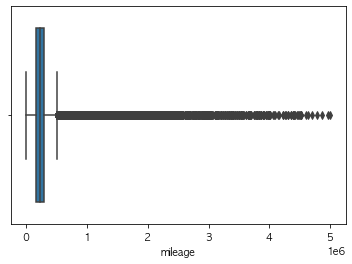

In [67]:
sns.boxplot(x=cancel['mileage'])

In [68]:
dictmile = round((cancel[cancel['mileage']>50000]).groupby('vehicle_model')['mileage'].median()).to_dict()

In [69]:
round((cancel[cancel['mileage']>50000]).groupby('vehicle_cat')['mileage'].median()).to_dict()

{'경형': 161000.0, '대형': 397000.0, '소형': 228000.0, '중형': 238000.0}

In [70]:
test = cancel.copy()

In [71]:
test.drop(columns =['manage_id','engine','vehicle_name','vin','first_manage_id','first_pur_amount'], inplace = True)

In [72]:
cancel[(cancel['mileage'].isna())]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
241,A0710000900223403,화물,밴,경형,Y7B11Z2,796.0,2.0,450.0,다마스 밴,2004,엘피지,국산,3485.0,1400.0,1920.0,수동,KLY7B11ZD4XXXXXX,서울,자가용,직권말소(강제처리),2017-04-01,일반소유용,2004-03-01,200403.0,법인및사업자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대우
248,A0810006212203112,화물,특수용도형-특수용도형,소형,HR-3NRSJKM-E522,2497.0,3.0,1000.0,포터Ⅱ 냉동탑차 (PORTER Ⅱ),2013,경유,국산,5220.0,1820.0,2400.0,수동,KMFZSZ7KADXXXXXX,서울,영업용,직권말소(면허취소),2017-04-01,일반소유용,2012-12-01,201212.0,법인및사업자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,현대
368,A0810003500033202,화물,일반형-카고,중형,HAUTDBLM-1,2607.0,6.0,1000.0,포터초장축더블캡(PORTER),2003,경유,국산,5075.0,1690.0,1930.0,수동,KMFXKD7BP3XXXXXX,대전,자가용,직권말소(강제처리),2017-04-01,일반소유용,2003-01-01,200301.0,법인및사업자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,현대
455,10080700820000,화물,일반형-카고,소형,SDL22D,2957.0,3.0,100.0,봉고프런티어,2002,경유,국산,5095.0,1750.0,1970.0,수동,KN3HAP53E2XXXXXX,대전,자가용,직권말소(강제처리),2017-04-01,일반소유용,2002-01-01,200201.0,법인및사업자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기아
496,10038800320000,화물,밴,소형,KJV2-DAB-2,2874.0,2.0,500.0,코란도-밴,2001,경유,국산,4330.0,1830.0,1840.0,자동,KPALE4A811XXXXXX,울산,자가용,직권말소(강제처리),2017-04-01,일반소유용,2001-12-01,200112.0,개인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097224,A0110003118573110,화물,일반형-카고,소형,PUK4CB-F,2902.0,3.0,1000.0,봉고Ⅲ 4륜구동,2011,경유,국산,4785.0,1740.0,2105.0,수동,KNCSHZ74CBKXXXXXX,충남,자가용,직권말소(기타),2022-07-01,일반소유용,2011-07-01,201106.0,개인,NaN,126.0,10.7,3130.0,A0110003117243109,3800.0,NaN,14500000.0,기아
1097247,A0110003128043115,화물,일반형-카고,소형,PUE6AJ,2497.0,6.0,1000.0,봉고Ⅲ 1톤,2016,경유,국산,5125.0,1740.0,1995.0,수동,KNCSJY76AGKXXXXXX,충북,자가용,직권말소(운행정지),2022-06-01,일반소유용,2015-12-01,201512.0,개인,NaN,133.0,9.7,3190.0,A0110003100003103,3800.0,NaN,15200000.0,기아
1097263,A0110003117133109,화물,일반형-카고,소형,PUL4AA,2902.0,3.0,1000.0,봉고Ⅲ 1톤,2010,경유,국산,5110.0,1740.0,1995.0,수동,KNCSJZ74AAKXXXXXX,경남,자가용,직권말소(강제처리),2022-07-01,일반소유용,2009-12-01,200912.0,개인,NaN,126.0,11.2,2955.0,A0110003100003103,3800.0,NaN,11800000.0,기아
1097301,A0110003131073118,화물,일반형-카고,소형,PUL6AM,2497.0,3.0,1000.0,봉고Ⅲ 1톤,2019,경유,국산,5115.0,1740.0,1995.0,수동,KNCSJZ76AKKXXXXXX,충남,자가용,직권말소(운행정지),2022-07-01,일반소유용,2018-10-01,201810.0,개인,NaN,133.0,9.6,2935.0,A0110003100003103,3600.0,4x2,14500000.0,기아


In [73]:
dictmile

{'견인': 500000.0,
 '구난': 271000.0,
 '덤프': 130000.0,
 '밴': 223000.0,
 '일반형-카고': 234000.0,
 '일반형-픽업': 215000.0,
 '특수용도형': 153000.0,
 '특수용도형-탱크로리': 205000.0,
 '특수용도형-특수용도형': 248000.0,
 '특수용도형-피견인': 200500.0,
 '특수작업형': 130000.0}

In [74]:
cancel.loc[(cancel['vehicle_model'] == '견인')&(cancel['mileage'].isna()),'mileage'] = 500000
cancel.loc[(cancel['vehicle_model'] == '구난')&(cancel['mileage'].isna()),'mileage'] = 271000
cancel.loc[(cancel['vehicle_model'] == '덤프')&(cancel['mileage'].isna()),'mileage'] = 130000
cancel.loc[(cancel['vehicle_model'] == '밴')&(cancel['mileage'].isna()),'mileage'] = 223000
cancel.loc[(cancel['vehicle_model'] == '일반형-카고')&(cancel['mileage'].isna()),'mileage'] = 234000
cancel.loc[(cancel['vehicle_model'] == '일반형-픽업')&(cancel['mileage'].isna()),'mileage'] = 215000
cancel.loc[(cancel['vehicle_model'] == '특수용도형')&(cancel['mileage'].isna()),'mileage'] = 153000
cancel.loc[(cancel['vehicle_model'] == '특수용도형-탱크로리')&(cancel['mileage'].isna()),'mileage'] = 205000
cancel.loc[(cancel['vehicle_model'] == '특수용도형-특수용도형')&(cancel['mileage'].isna()),'mileage'] = 248000
cancel.loc[(cancel['vehicle_model'] == '특수용도형-피견인')&(cancel['mileage'].isna()),'mileage'] = 200500
cancel.loc[(cancel['vehicle_model'] == '특수작업형')&(cancel['mileage'].isna()),'mileage'] = 130000

In [75]:
cancel.isna().sum()

manage_id                 0
vehicle_type              0
vehicle_model             0
vehicle_cat               0
engine                    0
displacement              0
passenger                 0
max_load                  0
vehicle_name              0
model_year                0
fuel                   9122
dom_import                0
len                       0
width                     0
height                    0
transmission              0
vin                    3721
reg_area                  0
purpose                   0
apply_category            0
sale_reg_date             0
reg_detail                0
first_reg_date            0
man_date                  0
member_classi             0
mileage                   0
max_output           580379
consum_rate          576611
weight               575776
first_manage_id      767140
rpm                  580394
dri_system          1089902
first_pur_amount     687802
mani                      0
dtype: int64

In [76]:
cancel.reset_index(drop=True,inplace=True)

In [77]:
cancel[cancel['vehicle_name'] == 'FL 카고']

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
575775,01120000900583315,화물,일반형-카고,대형,FL42R814L,7698.0,2.0,3100.0,FL 카고,2016,경유,외산,8930.0,2495.0,2850.0,자동,YV2T0Y1A7GZXXXXXX,전북,영업용,자진말소(대폐차),2019-12-01,일반소유용,2016-04-01,201511.0,법인및사업자,371000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,폭스바겐
683095,01120000900513315,화물,일반형-카고,대형,FL42R814L,7698.0,2.0,2000.0,FL 카고,2016,경유,외산,9940.0,2495.0,2850.0,자동,YV2T0Y1A4GZXXXXXX,충북,자가용,자진말소(폐차),2020-06-01,일반소유용,2016-08-01,201603.0,법인및사업자,275000.0,280.0,5.5,11345.0,01120000900003314,2100.0,NaN,79600000.0,폭스바겐


## NEWCOL

In [78]:
cancel_1 = cancel.iloc[:575776,:]

In [79]:
cancel_2 = cancel.iloc[575776:,:]

## MAXOUTPUT

In [80]:
a = cancel_2[cancel_2['max_output'].isna() & (cancel_2['displacement'] > 0)].index

In [81]:
cancel_2[cancel_2['max_output'].isna() & (cancel_2['displacement'] > 0)]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
717366,00032701049683117,화물,일반형-픽업,소형,0,3496.0,5.0,0.0,FORD F-150,2015,휘발유,외산,5890.0,2029.0,1910.0,자동,1FTFX1EF4FKXXXXXX,대구,자가용,자진말소(기타),2020-09-01,일반소유용,2017-11-01,201512.0,법인및사업자,39000.0,NaN,NaN,2874.0,00032701049283117,NaN,NaN,0.0,기타
735046,30412000000092,화물,일반형-픽업,중형,F350,5800.0,6.0,750.0,포드픽업,2000,엘피지,국산,6400.0,2000.0,1950.0,수동,NaN,경기,자가용,자진말소(폐차),2020-10-01,일반소유용,2002-03-01,200106.0,개인,233000.0,NaN,0.0,3860.0,NaN,NaN,NaN,0.0,기타
1071296,00034410000044303,특수,특수용도형,대형,NV113N,16031.0,3.0,10000.0,후소듸젤렛카,2002,경유,외산,9080.0,2490.0,3100.0,기타,NaN,경기,영업용,자진말소(폐차),2022-05-01,일반소유용,1980-07-01,198007.0,법인및사업자,485000.0,NaN,0.0,27145.0,NaN,NaN,NaN,0.0,기타


In [82]:
cancel_2.drop(index=a, inplace=True)

/var/folders/bc/t_lg49kj1072r4cpmxsqr2cc0000gn/T/ipykernel_4487/2586991620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_2.drop(index=a, inplace=True)


In [83]:
cancel_2.isna().sum()

manage_id                0
vehicle_type             0
vehicle_model            0
vehicle_cat              0
engine                   0
displacement             0
passenger                0
max_load                 0
vehicle_name             0
model_year               0
fuel                  4624
dom_import               0
len                      0
width                    0
height                   0
transmission             0
vin                   1778
reg_area                 0
purpose                  0
apply_category           0
sale_reg_date            0
reg_detail               0
first_reg_date           0
man_date                 0
member_classi            0
mileage                  0
max_output            4600
consum_rate            834
weight                   0
first_manage_id     191362
rpm                   4615
dri_system          514123
first_pur_amount    112026
mani                     0
dtype: int64

# CONSUMRATE

In [84]:
cancel_2[cancel_2['consum_rate'].isna()]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
575905,56G20000200004114,특수,특수작업형,소형,4500TR,0.0,0.0,0.0,직산(JIEXIAN)이동판매트레일러,2014,NaN,외산,3270.0,1630.0,2300.0,변속기 없음,KP9GN1ZTZEZXXXXXX,경기,자가용,자진말소(도로외의 지역에서의 한정 사용목적),2020-01-01,일반소유용,2014-08-01,201408.0,개인,1000.0,NaN,NaN,490.0,NaN,NaN,NaN,5800000.0,포르쉐
575997,30110100001655,화물,특수용도형-특수용도형,대형,DA-40SGC-28,0.0,0.0,25477.0,구즈넥콘테이너샤시,2000,기타연료,국산,12400.0,2420.0,3220.0,수동,KPC5EYH01JPXXXXXX,전남,영업용,자진말소(대폐차),2020-01-01,일반소유용,1988-12-01,198812.0,법인및사업자,1000.0,0.0,NaN,31770.0,NaN,0.0,NaN,0.0,쌍용
576037,4TJ20001300003115,화물,특수용도형-피견인,소형,5KTWS141,0.0,0.0,500.0,카라반(KARAVAN)보트트레일러,2015,NaN,외산,3860.0,1540.0,975.0,변속기 없음,5KTWS1419FFXXXXXX,경북,자가용,자진말소(폐차),2020-01-01,일반소유용,2015-06-01,201506.0,개인,1000.0,NaN,NaN,610.0,NaN,NaN,NaN,1300000.0,기타
576038,20019900000000,화물,특수용도형-특수용도형,대형,MC-306,0.0,0.0,24000.0,"30,000L알루미늄탱크트레일러",2000,NaN,외산,11170.0,2460.0,3120.0,수동,1HLA3A6B7J7XXXXXX,경북,자가용,자진말소(도로외의 지역에서의 한정 사용목적),2020-01-01,일반소유용,1988-10-01,198810.0,법인및사업자,0.0,NaN,NaN,28160.0,NaN,NaN,NaN,0.0,기타
576940,10006300140008,화물,일반형-카고,대형,TF301,0.0,0.0,26500.0,현대평판트레일러,2000,NaN,국산,12420.0,2457.0,1480.0,수동,KMBAA18APLUXXXXXX,부산,영업용,자진말소(폐차),2020-01-01,일반소유용,1990-04-01,199004.0,법인및사업자,1000.0,NaN,NaN,31900.0,NaN,NaN,NaN,0.0,현대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096288,10006000100000,화물,특수용도형-특수용도형,대형,DA-40SGC-22,0.0,0.0,22680.0,구즈넥콘테이너샤시,2002,NaN,외산,12402.0,2426.0,1770.0,수동,KPH40F001EPXXXXXX,경남,자가용,자진말소(폐차),2022-07-01,매매상품용,1984-05-01,198405.0,법인및사업자,1000.0,NaN,NaN,26180.0,NaN,NaN,NaN,NaN,포르쉐
1096977,B0710021500013312,화물,특수용도형-피견인,대형,ZDBGAL01-49401,0.0,0.0,24700.0,두성 50㎥ 사료 호퍼 트레일러,2013,NaN,국산,12170.0,2490.0,3770.0,변속기 없음,KN9BNEZTZDKXXXXXX,인천,영업용,자진말소(폐차),2022-07-01,일반소유용,2012-12-01,201212.0,법인및사업자,1000.0,NaN,NaN,30300.0,NaN,NaN,NaN,34500000.0,기아
1096992,BNZ10001500003311,화물,특수용도형-피견인,대형,ULPDC-403B,0.0,0.0,23000.0,유엘피 40피트 티핑샤시트레일러,2011,NaN,국산,12965.0,2495.0,3250.0,변속기 없음,KN9DNEZTZBCXXXXXX,부산,영업용,자진말소(폐차),2022-07-01,일반소유용,2011-09-01,201108.0,법인및사업자,1000.0,NaN,NaN,30700.0,NaN,NaN,NaN,27000000.0,기아
1096999,B4110002900013212,화물,특수용도형-피견인,중형,DT N600SB,0.0,0.0,1500.0,D.K 보트트레일러,2013,NaN,국산,7650.0,2480.0,1310.0,변속기 없음,KN9GN3ZTZDHXXXXXX,인천,자가용,자진말소(수출예정),2022-07-01,일반소유용,2014-03-01,201306.0,개인,1000.0,NaN,NaN,1990.0,NaN,NaN,NaN,4500000.0,기아


In [85]:
# k =cancel_2[cancel_2['consum_rate'].isna() & (cancel_2['displacement'] > 0)]['engine'].to_list()

In [86]:
cancel_2.loc[(cancel_2['engine'] == 'SL1-25WS-DP') & (cancel_2['consum_rate'].isna()),'consum_rate'] = 11
cancel_2.loc[(cancel_2['engine'] == 'SDL22D') & (cancel_2['consum_rate'].isna()),'consum_rate'] = 10.5
cancel_2.loc[(cancel_2['engine'] == 'JTWLS') & (cancel_2['consum_rate'].isna()),'consum_rate'] = 14.5
cancel_2.loc[(cancel_2['engine'] == 'HD11CM-SH'),'consum_rate'] = 3.52
cancel_2.loc[(cancel_2['engine'] == 'S2-8AFH') & (cancel_2['consum_rate'].isna()),'consum_rate'] = 15
cancel_2.loc[(cancel_2['engine'] == 'HD8.5M') & (cancel_2['consum_rate'].isna()),'consum_rate'] = 4.9
cancel_2.loc[(cancel_2['engine'] == 'HAU2BL-9') & (cancel_2['consum_rate'].isna()),'consum_rate'] = 14.8
cancel_2.loc[(cancel_2['engine'] == 'HD5CM-VL') & (cancel_2['consum_rate'].isna()),'consum_rate'] = 8.3
cancel_2.loc[(cancel_2['engine'] == 'FV415HRL') & (cancel_2['consum_rate'].isna()),'consum_rate'] = 2.5
cancel_2.loc[(cancel_2['engine'] == 'HD100-22') & (cancel_2['consum_rate'].isna()),'consum_rate'] = 17.2

In [87]:
# l = []
# for i in range(len(k)):
#     l.append(cancel_2[cancel_2['engine'] == k[i]]['consum_rate'].max())
# dic = { name:value for name, value in zip(l, k) }

In [88]:
m = cancel_2[cancel_2['consum_rate'].isna() & (cancel_2['displacement'] > 0)].index

In [89]:
cancel_2.drop(index = m,inplace=True)

/var/folders/bc/t_lg49kj1072r4cpmxsqr2cc0000gn/T/ipykernel_4487/3041284960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_2.drop(index = m,inplace=True)


In [90]:
cancel_2[cancel_2['consum_rate'].isna() & (~cancel_2['vehicle_name'].str.contains('트레일'))& (~cancel_2['vehicle_name'].str.contains('트래일'))
        & (~cancel_2['vehicle_name'].str.contains('샤시'))]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
606293,30110100001857,화물,특수용도형-특수용도형,대형,TC304-45-HP,0.0,0.0,27000.0,현대45익스텐션콘테이너트,2000,기타연료,국산,13980.0,2440.0,1460.0,수동,KMBCA18APKUXXXXXX,대전,영업용,자진말소(대폐차),2020-03-01,일반소유용,1989-04-01,198904.0,법인및사업자,1000.0,0.0,NaN,30750.0,NaN,0.0,NaN,NaN,현대
648188,30110100001857,화물,특수용도형-특수용도형,대형,TC304-45-HP,0.0,0.0,27000.0,현대45익스텐션콘테이너트,2000,기타연료,국산,13980.0,2440.0,1460.0,수동,KMBCA18APKUXXXXXX,부산,영업용,자진말소(폐차),2020-05-01,일반소유용,1989-04-01,198904.0,법인및사업자,1000.0,0.0,NaN,30750.0,NaN,0.0,NaN,NaN,현대
648189,30110100001857,화물,특수용도형-특수용도형,대형,TC304-45-HP,0.0,0.0,27000.0,현대45익스텐션콘테이너트,2000,기타연료,국산,13980.0,2440.0,1460.0,수동,KMBCA18APKUXXXXXX,부산,영업용,자진말소(폐차),2020-05-01,일반소유용,1989-04-01,198904.0,법인및사업자,1000.0,0.0,NaN,30750.0,NaN,0.0,NaN,NaN,현대
648292,30110100001857,화물,특수용도형-특수용도형,대형,TC304-45-HP,0.0,0.0,27000.0,현대45'익스텐션콘테이너트,2000,기타연료,국산,13980.0,2440.0,1460.0,수동,KMBCA18APKUXXXXXX,경북,영업용,자진말소(폐차),2020-05-01,일반소유용,1989-04-01,198904.0,법인및사업자,1000.0,0.0,NaN,30750.0,NaN,0.0,NaN,NaN,현대
684280,30110100001857,화물,특수용도형-특수용도형,대형,TC304-45-HP,0.0,0.0,27000.0,현대45익스텐션콘테이너트,2000,기타연료,국산,13980.0,2440.0,1460.0,수동,KMBCA18APKUXXXXXX,경북,자가용,자진말소(폐차),2020-07-01,일반소유용,1989-04-01,198904.0,개인,1000.0,0.0,NaN,30750.0,NaN,0.0,NaN,NaN,현대
700690,BU110000200044118,특수,특수용도형,소형,TMA(TL-2),0.0,0.0,0.0,스마트도로작업표시차,2019,NaN,국산,4060.0,2255.0,2950.0,변속기 없음,KP9GN2ZTZKSXXXXXX,경기,관용,자진말소(폐차),2020-08-01,일반소유용,2019-02-01,201901.0,법인및사업자,1000.0,NaN,NaN,740.0,BU110000100004112,NaN,NaN,38700000.0,쌍용
717182,BU110000100004112,특수,특수용도형,소형,TMA,0.0,0.0,0.0,스마트도로작업표시차,2012,NaN,국산,4010.0,2265.0,2980.0,변속기 없음,KP9GN2ZTZCKXXXXXX,경기,관용,자진말소(폐차),2020-09-01,일반소유용,2013-08-01,201307.0,법인및사업자,1000.0,NaN,NaN,690.0,NaN,NaN,NaN,33800000.0,쌍용
794543,30110100001857,화물,특수용도형-특수용도형,대형,TC304-45-HP,0.0,0.0,27000.0,현대45익스텐션콘테이너트,2001,기타연료,국산,13980.0,2440.0,1460.0,수동,KMBCA18APKUXXXXXX,부산,자가용,자진말소(폐차),2021-01-01,일반소유용,1989-04-01,198904.0,개인,0.0,0.0,NaN,30750.0,NaN,0.0,NaN,NaN,현대
806882,30110100001857,화물,특수용도형-특수용도형,대형,TC304-45-HP,0.0,0.0,27000.0,현대45익스텐션콘테이너트,2001,기타연료,국산,13980.0,2440.0,1460.0,수동,KMBCA18APKUXXXXXX,부산,자가용,자진말소(폐차),2021-02-01,일반소유용,1989-04-01,198904.0,개인,0.0,0.0,NaN,30750.0,NaN,0.0,NaN,NaN,현대
807071,30110100001857,화물,특수용도형-특수용도형,대형,TC304-45-HP,0.0,0.0,27000.0,현대45익스텐션콘테이너트,2001,기타연료,국산,13980.0,2440.0,1460.0,수동,KMBCA18APKUXXXXXX,부산,자가용,자진말소(폐차),2021-02-01,일반소유용,1989-04-01,198904.0,개인,0.0,0.0,NaN,30750.0,NaN,0.0,NaN,NaN,현대


In [91]:
cancel_2.isna().sum()

manage_id                0
vehicle_type             0
vehicle_model            0
vehicle_cat              0
engine                   0
displacement             0
passenger                0
max_load                 0
vehicle_name             0
model_year               0
fuel                  4624
dom_import               0
len                      0
width                    0
height                   0
transmission             0
vin                   1773
reg_area                 0
purpose                  0
apply_category           0
sale_reg_date            0
reg_detail               0
first_reg_date           0
man_date                 0
member_classi            0
mileage                  0
max_output            4600
consum_rate            793
weight                   0
first_manage_id     191337
rpm                   4612
dri_system          514100
first_pur_amount    112024
mani                     0
dtype: int64

# RPM

In [92]:
cancel_2[cancel_2['rpm'].isna() & (~cancel_2['vehicle_name'].str.contains('트레일'))& (~cancel_2['vehicle_name'].str.contains('트래일'))
        & (~cancel_2['vehicle_name'].str.contains('샤시')) & (~cancel_2['vehicle_name'].str.contains('콘테이너트'))& (~cancel_2['vehicle_name'].str.contains('RW'))
        & (cancel_2['displacement']>0)]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
575784,30482200010003,특수,견인,대형,TW-100,14886.0,3.0,10000.0,후소레카,2000,경유,외산,9920.0,2490.0,3440.0,수동,NaN,전북,자가용,자진말소(폐차),2020-01-01,일반소유용,1980-05-01,198005.0,법인및사업자,687000.0,280.0,0.0,19165.0,NaN,NaN,NaN,0.0,기타
589595,20125000000000,특수,구난,대형,FV435PLDMA-OC-25,16031.0,3.0,2500.0,타다노대형렉카트럭,2000,경유,외산,9650.0,2495.0,3400.0,수동,NaN,경남,자가용,자진말소(폐차),2020-02-01,일반소유용,1992-09-01,199209.0,개인,750000.0,320.0,4.0,25015.0,NaN,NaN,NaN,NaN,기타
626787,20055500000000,화물,특수용도형-특수용도형,대형,LTS9000,10481.0,2.0,11000.0,포드분진수거차,2000,경유,외산,10060.0,2440.0,3800.0,수동,1FDZY90T4NVXXXXXX,전북,자가용,자진말소(폐차),2020-04-01,일반소유용,1992-09-01,199209.0,법인및사업자,146000.0,300.0,2.5,23270.0,NaN,NaN,NaN,NaN,기타
895953,10055100000000,화물,특수용도형-특수용도형,중형,KCK538,6728.0,3.0,4500.0,오일통분쇄차,2001,경유,국산,7000.0,2230.0,3300.0,수동,KRV4MS3J3SCXXXXXX,경북,자가용,자진말소(폐차),2021-05-01,일반소유용,1995-11-01,199511.0,개인,142000.0,165.0,8.0,8815.0,NaN,NaN,NaN,0.0,쌍용
896633,30110800000182,화물,밴,중형,CG-31303,6229.0,2.0,700.0,시보레트럭밴,2001,경유,외산,5380.0,2130.0,2500.0,자동,2GCGG31J9G4XXXXXX,경기,자가용,자진말소(환가가치 차령초과),2021-06-01,일반소유용,2000-02-01,199909.0,개인,33000.0,137.0,0.0,3380.0,NaN,NaN,NaN,0.0,기타
989297,30481500000001,특수,견인,대형,P113HL6X2E-A,11021.0,2.0,17500.0,스카니아 트랙터,2001,경유,국산,6530.0,2480.0,2780.0,수동,KN5RET152MKXXXXXX,부산,영업용,자진말소(폐차),2021-12-01,일반소유용,1991-05-01,199105.0,개인,731000.0,314.0,0.0,25210.0,NaN,NaN,NaN,0.0,기아
991468,30420300002150,화물,일반형-픽업,중형,포트픽업,5800.0,6.0,750.0,포트픽업,2001,엘피지,국산,6300.0,2000.0,1950.0,자동,2FTJW36H3LCXXXXXX,경기,자가용,자진말소(수출예정),2021-12-01,일반소유용,2002-07-01,200207.0,개인,54000.0,185.0,6.0,3400.0,NaN,NaN,NaN,0.0,기타
1000682,30431300000079,화물,덤프,대형,69,7255.0,3.0,4000.0,GMC,2001,경유,외산,6750.0,2450.0,2650.0,수동,NaN,충북,자가용,자진말소(폐차),2021-12-01,일반소유용,1969-02-01,196902.0,개인,84000.0,185.0,0.0,11015.0,NaN,NaN,NaN,NaN,기타


In [93]:
m =cancel_2[cancel_2['rpm'].isna() & (~cancel_2['vehicle_name'].str.contains('트레일'))& (~cancel_2['vehicle_name'].str.contains('트래일'))
        & (~cancel_2['vehicle_name'].str.contains('샤시')) & (~cancel_2['vehicle_name'].str.contains('콘테이너트'))& (~cancel_2['vehicle_name'].str.contains('RW'))
        & (cancel_2['displacement']>0)].index

In [94]:
cancel_2.drop(index=m, inplace = True)

/var/folders/bc/t_lg49kj1072r4cpmxsqr2cc0000gn/T/ipykernel_4487/1791638627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_2.drop(index=m, inplace = True)


In [95]:
cancel_2[cancel_2['rpm'].isna() & (~cancel_2['vehicle_name'].str.contains('트레일'))& (~cancel_2['vehicle_name'].str.contains('트래일'))
        & (~cancel_2['vehicle_name'].str.contains('샤시')) & (~cancel_2['vehicle_name'].str.contains('콘테이너트'))& (~cancel_2['vehicle_name'].str.contains('RW'))
        & (cancel_2['displacement']>0)]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani


In [96]:
cancel_2.isna().sum()

manage_id                0
vehicle_type             0
vehicle_model            0
vehicle_cat              0
engine                   0
displacement             0
passenger                0
max_load                 0
vehicle_name             0
model_year               0
fuel                  4624
dom_import               0
len                      0
width                    0
height                   0
transmission             0
vin                   1770
reg_area                 0
purpose                  0
apply_category           0
sale_reg_date            0
reg_detail               0
first_reg_date           0
man_date                 0
member_classi            0
mileage                  0
max_output            4600
consum_rate            793
weight                   0
first_manage_id     191329
rpm                   4604
dri_system          514092
first_pur_amount    112021
mani                     0
dtype: int64

In [97]:
cancel_2[cancel_2['first_manage_id'].isna()]

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
575776,10156400030000,특수,구난,중형,KJW-HL113,2497.0,3.0,500.0,국제렉커차,2002,경유,국산,5490.0,1820.0,2100.0,수동,NaN,충북,자가용,자진말소(폐차),2020-01-01,일반소유용,2002-11-01,200210.0,개인,420000.0,103.0,13.6,3415.0,NaN,3800.0,NaN,0.0,기타
575777,20309900000000,특수,견인,대형,P124GA6X2NZ,11705.0,2.0,17500.0,스카니아트랙터,2000,경유,외산,6755.0,2490.0,3000.0,수동,NaN,인천,영업용,자진말소(대폐차),2020-01-01,일반소유용,1999-03-01,199903.0,법인및사업자,746000.0,400.0,3.1,25810.0,NaN,1900.0,NaN,NaN,기타
575778,10158600020000,특수,구난,중형,SLW100H,2476.0,3.0,500.0,수성중형렉커트럭,2002,경유,국산,5785.0,1820.0,2020.0,수동,NaN,강원,자가용,자진말소(폐차),2020-01-01,일반소유용,2002-01-01,200201.0,개인,298000.0,103.0,13.6,3195.0,NaN,3800.0,NaN,0.0,기타
575779,10156400030000,특수,구난,중형,KJW-HL113,2476.0,3.0,500.0,국제렉커차,2001,경유,국산,5490.0,1820.0,2100.0,수동,NaN,경남,영업용,자진말소(폐차),2020-01-01,일반소유용,2001-04-01,200104.0,개인,443000.0,103.0,13.6,3415.0,NaN,3800.0,NaN,NaN,기타
575780,10156400050000,특수,구난,중형,KJW-HL115L,2972.0,3.0,500.0,국제렉커차,2001,엘피지,국산,5660.0,1820.0,2100.0,수동,NaN,경북,영업용,자진말소(폐차),2020-01-01,일반소유용,2001-09-01,200109.0,법인및사업자,241000.0,135.0,8.6,3415.0,NaN,4500.0,NaN,0.0,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097251,10144200000000,화물,특수용도형-특수용도형,대형,HTD-40XBB,0.0,0.0,21500.0,한특65.1㎥아비셀트레일러,2002,NaN,국산,12995.0,2460.0,4000.0,기타,KRLBDMBX2YUXXXXXX,부산,영업용,자진말소(폐차),2022-07-01,일반소유용,2000-03-01,200003.0,법인및사업자,1000.0,NaN,0.0,30900.0,NaN,NaN,NaN,0.0,쌍용
1097252,10097700000000,화물,특수용도형-특수용도형,대형,HCC-40XAB,0.0,0.0,26000.0,한특40피트콤비네이션샤시,2002,NaN,국산,12415.0,2460.0,1470.0,기타,KRLDCDBX02UXXXXXX,부산,영업용,자진말소(폐차),2022-07-01,일반소유용,2002-05-01,200205.0,법인및사업자,1000.0,NaN,0.0,30900.0,NaN,NaN,NaN,0.0,쌍용
1097253,10097700040000,화물,특수용도형-특수용도형,대형,HCC-40XES,0.0,0.0,24500.0,한특40피트콤비슬라이드샤시,2002,NaN,국산,12415.0,2460.0,1495.0,기타,KRLDCDCX3XUXXXXXX,부산,영업용,자진말소(폐차),2022-07-01,일반소유용,1999-07-01,199907.0,법인및사업자,1000.0,NaN,0.0,30800.0,NaN,NaN,NaN,0.0,쌍용
1097254,10178700020000,화물,특수용도형-특수용도형,대형,HCG-40XIB,0.0,0.0,25500.0,한특40피트구즈넥콤비샤시,2002,NaN,국산,12580.0,2470.0,1470.0,기타,KRLDCXBX12UXXXXXX,서울,영업용,자진말소(대폐차),2022-07-01,일반소유용,2002-08-01,200208.0,법인및사업자,1000.0,NaN,0.0,30600.0,NaN,NaN,NaN,0.0,쌍용


In [98]:
# k = cancel_2[cancel_2['first_manage_id'].isna()]['manage_id'].to_list()
# l = []
# for i in range(len(k)):
#      l.append((cancel_2[cancel_2['manage_id'] == k[i]]['first_manage_id'].mode()))
# dic = { name:value for name, value in zip(k, l) }

In [99]:
# (cancel_2[cancel_2['manage_id'] == k[10]]['first_manage_id'].mode())

In [100]:
# for k in dic.keys():    
#     cancel_2.loc[(cancel_2['engine'] == k) & (cancel_2['rpm'].isna()),'consum_rate'] = dic[k]

# MANI,DOM 

In [101]:
cancel = pd.concat([cancel_1,cancel_2])

In [102]:
cancel.reset_index(drop=True,inplace=True)

In [103]:
m = cancel['mani'].unique().tolist()

In [104]:
kor=['대우', '기아','쌍용', '현대']
fore = list(set(m)-set(kor))
fore

['아우디', '기타', '포르쉐', 'BMW', '폭스바겐', '벤츠']

In [105]:
fore.remove('기타')

In [106]:
cancel.loc[cancel['mani'].isin(kor),'dom_import'] = '국산'
cancel.loc[cancel['mani'].isin(fore),'dom_import'] = '외산'

In [107]:
cancel

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
0,10008400140002,특수,견인,대형,CWE60GTL-BC,14618.0,3.0,17000.0,쌍용트랙타,1997,경유,국산,6655.0,2495.0,3100.0,수동,KPFMC7CM1RXXXXXX,인천,영업용,자진말소(폐차),2017-04-01,일반소유용,1994-05-01,199405.0,법인및사업자,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
1,10096500120000,특수,견인,대형,HD440-TRT-THA,12920.0,2.0,16500.0,현대트랙터(터보),2001,경유,국산,6685.0,2495.0,2950.0,수동,KMEFJ18SP1XXXXXX,대구,자가용,자진말소(수출예정),2017-04-01,매매상품용,2001-11-01,200110.0,법인및사업자,378000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,현대
2,B0P10002500004104,특수,구난,소형,KJW-KB104,2902.0,3.0,500.0,국제렉커,2004,경유,국산,4945.0,1820.0,2320.0,수동,KP95J4MDD4XXXXXX,인천,자가용,자진말소(폐차),2017-04-01,일반소유용,2004-10-01,200410.0,개인,468000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
3,20382000000000,특수,견인,대형,FM12,12130.0,2.0,17500.0,볼보6X2트랙터,2002,경유,외산,7080.0,2490.0,2950.0,수동,YV2J4CFC02XXXXXX,부산,영업용,자진말소(폐차),2017-04-01,일반소유용,2002-09-01,200207.0,법인및사업자,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,폭스바겐
4,B0V10005200004304,특수,특수작업형,대형,SROD8507,7640.0,5.0,0.0,세원구조공작차,2005,경유,국산,8535.0,2495.0,3400.0,자동,KP93J8AKD5XXXXXX,대구,자가용,자진말소(폐차),2017-04-01,일반소유용,2005-02-01,200501.0,개인,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097329,A0110003301883110,화물,특수용도형-특수용도형,소형,PUL4AB-12-PGT,2902.0,3.0,850.0,봉고Ⅲ 파워게이트,2011,경유,국산,5420.0,1750.0,2085.0,수동,KNFWXZ74ABKXXXXXX,서울,자가용,자진말소(폐차),2022-07-01,일반소유용,2011-03-01,201103.0,개인,313000.0,133.0,9.6,3385.0,A0110003300003204,3800.0,NaN,17300000.0,기아
1097330,A0110003302533113,화물,특수용도형-특수용도형,소형,PUL6AG-12-L9-PGT,2497.0,3.0,1000.0,봉고Ⅲ 파워게이트,2014,경유,국산,5420.0,1750.0,2085.0,수동,KNFWXZ76AEKXXXXXX,인천,자가용,자진말소(수출예정),2022-07-01,일반소유용,2014-04-01,201403.0,개인,380000.0,133.0,8.1,3320.0,A0110003300003204,3800.0,NaN,18600000.0,기아
1097331,46M20000900003315,화물,특수용도형-피견인,대형,PST/SL-E6,0.0,0.0,227700.0,골드호퍼모듈트레일러,2015,NaN,외산,9500.0,3000.0,1160.0,변속기 없음,WG0PST066F0XXXXXX,부산,영업용,자진말소(수출예정),2022-07-01,일반소유용,2015-07-01,201506.0,법인및사업자,1000.0,NaN,NaN,253200.0,NaN,NaN,NaN,300000000.0,기타
1097332,B6620037200003317,화물,특수용도형-특수용도형,대형,KTA24PAR-M64D1-VOL18.5SS,10837.0,2.0,19600.0,한국쓰리축24톤암롤트럭,2017,경유,외산,8580.0,2495.0,3000.0,자동,YV2XZX0D5HAXXXXXX,전남,영업용,자진말소(폐차),2022-07-01,일반소유용,2017-10-01,201710.0,법인및사업자,354000.0,450.0,3.3,39350.0,01120000702823316,1800.0,NaN,154000000.0,폭스바겐


In [108]:
cancel.loc[cancel['vehicle_name'].str.contains('볼보'),'mani'] = '볼보'

In [109]:
cancel.loc[(cancel['vehicle_name'].str.contains('한국')) &(cancel['dom_import'] == '외산')] # 이거 어떻게 처리해야될까? 차대번호는 외국인데 이름은 대놓고 한국이라서..애매하네

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
246815,B6620014000023316,화물,일반형-카고,대형,KTA26P-M64D1-VOL17M,10837.0,2.0,21600.0,한국쓰리축26톤카고트럭,2017,경유,외산,10735.0,2495.0,3140.0,자동,YV2XZX0DXHAXXXXXX,전북,영업용,자진말소(기타),2018-07-01,일반소유용,2018-01-01,201712.0,법인및사업자,34000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,폭스바겐
250104,B3C20001600003309,화물,일반형-카고,대형,K4.5C1-9PD-B4.5EU,6374.0,2.0,4500.0,한국특장기술4.5톤트럭,2010,경유,외산,10310.0,2495.0,2650.0,수동,WDB970059ALXXXXXX,충남,영업용,자진말소(대폐차),2018-07-01,일반소유용,2009-11-01,200911.0,개인,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,벤츠
367180,BEU20012900003316,화물,특수용도형-특수용도형,대형,KCT21WBT2-SCA14CT2,12742.0,2.0,20000.0,한국상용21톤윙바디트럭,2016,경유,외산,12990.0,2495.0,3970.0,자동,YS2G6X400G2XXXXXX,인천,자가용,직권말소(기타),2019-03-01,일반소유용,2016-07-01,201607.0,개인,248000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타
372874,BEU20034300003318,화물,일반형-카고,대형,KCT8.5HT-VOL4.5CT68,7698.0,2.0,8500.0,한국상용8.5톤카고트럭,2018,경유,외산,9960.0,2495.0,2900.0,자동,YV2T0Y1AXJZXXXXXX,울산,영업용,자진말소(대폐차),2019-03-01,일반소유용,2018-05-01,201805.0,법인및사업자,39000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,폭스바겐
417787,B6620000300003307,화물,일반형-카고,대형,KTA4.5W-HN4.5,7684.0,3.0,4500.0,한국쓰리축윙바디,2007,경유,외산,9630.0,2470.0,3660.0,수동,JHDFD8JMU7XXXXXXX,인천,자가용,자진말소(폐차),2019-05-01,일반소유용,2007-11-01,200711.0,법인및사업자,137000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096109,B6620004000013312,화물,일반형-카고,대형,KTA7.5T-H3-BZ5,6374.0,2.0,5400.0,한국쓰리축7.5톤트럭,2013,경유,외산,10445.0,2495.0,3030.0,수동,WDB970059DLXXXXXX,광주,영업용,자진말소(폐차),2022-07-01,일반소유용,2013-04-01,201303.0,법인및사업자,841000.0,286.0,7.0,14920.0,03620001700123310,2200.0,NaN,90500000.0,벤츠
1096786,BEU20008700013315,화물,특수용도형-특수용도형,대형,KCT16WBT1-SCA14CT2,12742.0,2.0,16000.0,한국상용16톤윙바디트럭,2016,경유,외산,12990.0,2495.0,3970.0,자동,YS2G6X400G2XXXXXX,광주,영업용,자진말소(폐차),2022-07-01,일반소유용,2015-10-01,201510.0,법인및사업자,934000.0,410.0,3.5,30350.0,01520005500003315,1900.0,NaN,211200000.0,기타
1096862,B6620015100003315,화물,일반형-카고,대형,KTA6.5T-FL42-VOL5D,7698.0,2.0,4300.0,한국쓰리축6.5톤트럭,2015,경유,외산,9940.0,2495.0,2880.0,자동,YV2T0Y1AXFZXXXXXX,대구,영업용,자진말소(폐차),2022-07-01,일반소유용,2015-08-01,201508.0,개인,756000.0,280.0,5.5,14240.0,01120000900073315,2100.0,NaN,86800000.0,폭스바겐
1096863,B6620052700003319,화물,일반형-카고,대형,KTA27P-M64D1-VOL29A,10837.0,2.0,23500.0,한국쓰리축27톤트럭,2020,경유,외산,9275.0,2495.0,3150.0,자동,YV2XZY0D8LAXXXXXX,강원,자가용,자진말소(폐차),2022-07-01,일반소유용,2020-11-01,202011.0,법인및사업자,60000.0,460.0,3.3,38750.0,01150000701863019,1800.0,8x4,135100000.0,폭스바겐


In [110]:
# man_date
file_12 = cancel
file_12['man_date'] = file_12['man_date'].astype({'man_date':'int64'})
file_12['man_date'] = file_12['man_date'].astype({'man_date':'object'})

for i, value in enumerate(file_12['man_date'].values):
    file_12['man_date'].values[i] = f"{str(value)[:4]}-{str(value)[4:]}-01"

file_12['man_date'] = pd.to_datetime(file_12['man_date'],format='%Y-%m-%d')

cancel = file_12

In [111]:
cancel

,manage_id,vehicle_type,vehicle_model,vehicle_cat,engine,displacement,passenger,max_load,vehicle_name,model_year,fuel,dom_import,len,width,height,transmission,vin,reg_area,purpose,apply_category,sale_reg_date,reg_detail,first_reg_date,man_date,member_classi,mileage,max_output,consum_rate,weight,first_manage_id,rpm,dri_system,first_pur_amount,mani
0,10008400140002,특수,견인,대형,CWE60GTL-BC,14618.0,3.0,17000.0,쌍용트랙타,1997,경유,국산,6655.0,2495.0,3100.0,수동,KPFMC7CM1RXXXXXX,인천,영업용,자진말소(폐차),2017-04-01,일반소유용,1994-05-01,1994-05-01,법인및사업자,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
1,10096500120000,특수,견인,대형,HD440-TRT-THA,12920.0,2.0,16500.0,현대트랙터(터보),2001,경유,국산,6685.0,2495.0,2950.0,수동,KMEFJ18SP1XXXXXX,대구,자가용,자진말소(수출예정),2017-04-01,매매상품용,2001-11-01,2001-10-01,법인및사업자,378000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,현대
2,B0P10002500004104,특수,구난,소형,KJW-KB104,2902.0,3.0,500.0,국제렉커,2004,경유,국산,4945.0,1820.0,2320.0,수동,KP95J4MDD4XXXXXX,인천,자가용,자진말소(폐차),2017-04-01,일반소유용,2004-10-01,2004-10-01,개인,468000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
3,20382000000000,특수,견인,대형,FM12,12130.0,2.0,17500.0,볼보6X2트랙터,2002,경유,외산,7080.0,2490.0,2950.0,수동,YV2J4CFC02XXXXXX,부산,영업용,자진말소(폐차),2017-04-01,일반소유용,2002-09-01,2002-07-01,법인및사업자,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,볼보
4,B0V10005200004304,특수,특수작업형,대형,SROD8507,7640.0,5.0,0.0,세원구조공작차,2005,경유,국산,8535.0,2495.0,3400.0,자동,KP93J8AKD5XXXXXX,대구,자가용,자진말소(폐차),2017-04-01,일반소유용,2005-02-01,2005-01-01,개인,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쌍용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097329,A0110003301883110,화물,특수용도형-특수용도형,소형,PUL4AB-12-PGT,2902.0,3.0,850.0,봉고Ⅲ 파워게이트,2011,경유,국산,5420.0,1750.0,2085.0,수동,KNFWXZ74ABKXXXXXX,서울,자가용,자진말소(폐차),2022-07-01,일반소유용,2011-03-01,2011-03-01,개인,313000.0,133.0,9.6,3385.0,A0110003300003204,3800.0,NaN,17300000.0,기아
1097330,A0110003302533113,화물,특수용도형-특수용도형,소형,PUL6AG-12-L9-PGT,2497.0,3.0,1000.0,봉고Ⅲ 파워게이트,2014,경유,국산,5420.0,1750.0,2085.0,수동,KNFWXZ76AEKXXXXXX,인천,자가용,자진말소(수출예정),2022-07-01,일반소유용,2014-04-01,2014-03-01,개인,380000.0,133.0,8.1,3320.0,A0110003300003204,3800.0,NaN,18600000.0,기아
1097331,46M20000900003315,화물,특수용도형-피견인,대형,PST/SL-E6,0.0,0.0,227700.0,골드호퍼모듈트레일러,2015,NaN,외산,9500.0,3000.0,1160.0,변속기 없음,WG0PST066F0XXXXXX,부산,영업용,자진말소(수출예정),2022-07-01,일반소유용,2015-07-01,2015-06-01,법인및사업자,1000.0,NaN,NaN,253200.0,NaN,NaN,NaN,300000000.0,기타
1097332,B6620037200003317,화물,특수용도형-특수용도형,대형,KTA24PAR-M64D1-VOL18.5SS,10837.0,2.0,19600.0,한국쓰리축24톤암롤트럭,2017,경유,외산,8580.0,2495.0,3000.0,자동,YV2XZX0D5HAXXXXXX,전남,영업용,자진말소(폐차),2022-07-01,일반소유용,2017-10-01,2017-10-01,법인및사업자,354000.0,450.0,3.3,39350.0,01120000702823316,1800.0,NaN,154000000.0,폭스바겐


In [112]:
cancel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097334 entries, 0 to 1097333
Data columns (total 34 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   manage_id         1097334 non-null  category      
 1   vehicle_type      1097334 non-null  category      
 2   vehicle_model     1097334 non-null  category      
 3   vehicle_cat       1097334 non-null  category      
 4   engine            1097334 non-null  category      
 5   displacement      1097334 non-null  float32       
 6   passenger         1097334 non-null  float32       
 7   max_load          1097334 non-null  float32       
 8   vehicle_name      1097334 non-null  category      
 9   model_year        1097334 non-null  int32         
 10  fuel              1088212 non-null  category      
 11  dom_import        1097334 non-null  category      
 12  len               1097334 non-null  float32       
 13  width             1097334 non-null  float3

In [113]:
cancel['mani'] = cancel['mani'].astype('category')

In [114]:
cancel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097334 entries, 0 to 1097333
Data columns (total 34 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   manage_id         1097334 non-null  category      
 1   vehicle_type      1097334 non-null  category      
 2   vehicle_model     1097334 non-null  category      
 3   vehicle_cat       1097334 non-null  category      
 4   engine            1097334 non-null  category      
 5   displacement      1097334 non-null  float32       
 6   passenger         1097334 non-null  float32       
 7   max_load          1097334 non-null  float32       
 8   vehicle_name      1097334 non-null  category      
 9   model_year        1097334 non-null  int32         
 10  fuel              1088212 non-null  category      
 11  dom_import        1097334 non-null  category      
 12  len               1097334 non-null  float32       
 13  width             1097334 non-null  float3

In [115]:
def fillfunc(col,tool, transfer=transfer):
    mi = set(transfer[(transfer[col].isna())][tool].tolist())
    for i in mi:
        t = transfer.loc[(transfer[tool] == i)][col]
        if len(t.unique()) <= 1:
            continue
        transfer.loc[(transfer[col].isna()) & (transfer[tool] == i), col] = t.mode()[0]

In [117]:
nacol = ['displacement','passenger','max_load','vehicle_name','model_year','fuel','dom_import','len','width','transmission','consum_rate','weight','rpm']
tool = ['manage_id','engine','vin']

In [118]:
for i in nacol:
    for k in tool:
        fillfunc(i,k,transfer=cancel)

In [121]:
cancel.drop(columns = ['engine','vin'], inplace = True)

In [123]:
cancel.to_parquet('cancel_final.parquet', index = False)